#### SETUP

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from copy import deepcopy
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import warnings
warnings.filterwarnings("ignore")


In [2]:
summary_mean = pd.read_csv('Summary/summary_mean_final.csv')
summary_count = pd.read_csv('Summary/summary_count_final.csv')
sites_in_consideration = pd.read_csv('files/list_of_sites.csv')
summary_mean = deepcopy(summary_mean[summary_mean['site_id'].isin(sites_in_consideration['site_id'])].reset_index(drop=True))
summary_mean['pollutant'] = pd.merge(summary_mean, sites_in_consideration.groupby('site_id').agg({'pollutant':','.join}).reset_index(), on='site_id', how='inner')['pollutant'] 
summary_mean_mapping_2023 = pd.read_csv('Summary/2023_summary_mapping.csv').drop_duplicates()
summary_mean_mapping_2019 = pd.read_csv('Summary/2019_summary_mapping.csv').drop_duplicates()
site_master = pd.read_csv('files/sites_master.csv')
sites_master = pd.read_csv('files/sites_master.csv')
master_summary = pd.merge(summary_mean,summary_count,how='left',on=['site_id','year'],suffixes=(None,'_count'))

In [3]:
summary_count['Percent_Coverage'] = ((summary_count['NO2_CPCB']/summary_count['timestamp']))*100

In [4]:
pd.set_option('display.max_columns', None)
summary_count

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,prevalent_error,errors,Percent_Coverage
0,35040.0,29671.0,27524.0,32099.0,32048.0,32091.0,0.0,29776.0,32160.0,32291.0,29668.0,27847.0,27847.0,27523.0,25742.0,25742.0,29318.0,26569.0,26569.0,29552.0,27108.0,27108.0,31332.0,27813.0,27813.0,30761.0,26931.0,26931.0,23304.0,23304.0,23304.0,26569.0,23304.0,23304.0,23304.0,23304.0,85,2019,site_168,Bandra_Mumbai_MPCB,C2,"C1,C2,C4,C6",66.506849
1,35136.0,21206.0,12606.0,24817.0,25789.0,25743.0,0.0,23242.0,27623.0,25559.0,21203.0,20050.0,20050.0,12528.0,11858.0,11858.0,7965.0,7335.0,7335.0,7332.0,6808.0,6808.0,6080.0,5495.0,5495.0,7080.0,5191.0,5191.0,5129.0,5129.0,5129.0,7335.0,5129.0,5129.0,5129.0,5129.0,959,2020,site_168,Bandra_Mumbai_MPCB,C2,"C1,C2,C4,C6",14.597564
2,35040.0,24567.0,25976.0,20025.0,21092.0,20143.0,0.0,25085.0,23468.0,18806.0,12413.0,9489.0,9489.0,7397.0,5302.0,5302.0,3585.0,3353.0,3353.0,3134.0,2711.0,2711.0,4179.0,3893.0,3893.0,11406.0,10763.0,10763.0,1589.0,1589.0,1589.0,3353.0,1597.0,1597.0,1597.0,1597.0,163,2021,site_168,Bandra_Mumbai_MPCB,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",4.534817
3,35040.0,12623.0,12266.0,12873.0,12871.0,12880.0,12270.0,12612.0,12321.0,10548.0,12617.0,11138.0,11138.0,12235.0,10824.0,10824.0,12879.0,11770.0,11770.0,12854.0,11812.0,11812.0,12872.0,11569.0,11569.0,3081.0,2920.0,2920.0,10617.0,10617.0,10617.0,11770.0,10617.0,10617.0,10617.0,10617.0,15,2019,site_5102,Vasai_West_Mumbai_MPCB,C2,"C1,C2,C4,C6",30.299658
4,35136.0,24355.0,18071.0,32575.0,29835.0,32576.0,28387.0,20478.0,29718.0,16499.0,24061.0,21618.0,21618.0,17741.0,15885.0,15885.0,32290.0,30911.0,30911.0,29792.0,27995.0,27995.0,32474.0,30305.0,30305.0,1899.0,1722.0,1722.0,25667.0,25667.0,25667.0,30911.0,25667.0,25667.0,25667.0,25667.0,2742,2020,site_5102,Vasai_West_Mumbai_MPCB,C2,"C2,C4,C6",73.050433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,35040.0,4899.0,4899.0,4760.0,4897.0,4897.0,4858.0,4830.0,4630.0,4776.0,4824.0,4397.0,4397.0,4602.0,4015.0,4015.0,4892.0,4506.0,4506.0,4893.0,4499.0,4499.0,4758.0,4158.0,4158.0,4775.0,4324.0,4324.0,3849.0,3849.0,3849.0,4506.0,3849.0,3849.0,3849.0,3849.0,137,2023,site_5960,Byculla_Mumbai_BMC,C1,"C1,C4",10.984589
114,31051.0,575.0,575.0,575.0,575.0,575.0,575.0,574.0,574.0,564.0,551.0,495.0,495.0,553.0,491.0,491.0,572.0,534.0,534.0,571.0,525.0,525.0,574.0,506.0,506.0,556.0,518.0,518.0,466.0,466.0,466.0,534.0,466.0,466.0,466.0,466.0,0,2023,site_5961,Shivaji_Nagar_Mumbai_BMC,C1,C1,1.500757
115,35040.0,3945.0,3722.0,3425.0,3460.0,3489.0,3017.0,3966.0,3968.0,3710.0,3726.0,3267.0,3267.0,3658.0,3237.0,3237.0,3470.0,3162.0,3162.0,3447.0,3195.0,3195.0,3398.0,2928.0,2928.0,3692.0,3377.0,3377.0,2766.0,2766.0,2766.0,3162.0,2766.0,2766.0,2766.0,2766.0,69,2023,site_5962,Kandivali_West_Mumbai_BMC,C1,"C1,C2,C4",7.893836
116,35040.0,3729.0,3737.0,3767.0,3838.0,3859.0,3797.0,3848.0,3850.0,3684.0,3725.0,3299.0,3299.0,3725.0,3290.0,3290.0,3854.0,3547.0,3547.0,3838.0,3573.0,3573.0,3767.0,3272.0,3272.0,3682.0,3279.0,3279.0,3032.0,3032.0,3032.0,3547.0,3032.0,3032.0,3032.0,3032.0,103,2023,site_5963,Sewri_Mumbai_BMC,C1,"C1,C4",8.652968


In [5]:
pd.merge(summary_count[['timestamp','site_id','site_name','year','NO2','NO2_CPCB','Percent_Coverage','prevalent_error']],summary_mean[['pollutant','site_id','year']], how='left', on=['site_id','year']).to_csv('count_summary_percentage.csv')

In [6]:
summary_mean_map_plot = pd.read_csv('files/summary_mean_map_plot.csv')

In [7]:
pols = ['PM25', 'PM10', 'NO2', 'NO', 'Ozone']
cols = summary_mean.columns.tolist()

In [8]:
summary_mean[summary_mean['pollutant'].str.len() < 12]

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,AQI_before_cleaning,AQI_after_cleaning,errors,prevalent_error,pollutant


In [9]:
summary_mean[summary_mean['site_id'] == 'site_5112']

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,AQI_before_cleaning,AQI_after_cleaning,errors,prevalent_error,pollutant
35,17519.5,30.918997,60.492065,6.093199,10.277686,16.117752,31.931502,7.395594,0.784054,16.362171,30.919252,30.599656,30.599656,60.488553,60.216706,60.216706,16.121052,15.593173,15.593173,10.278051,9.956167,9.956167,6.094668,5.758596,5.758596,16.369847,16.349708,16.349708,6.388125,18.469269,15.016212,16.593173,-5.567848,0.002051,-4.596660,-0.969136,372,2019,site_5112,Powai_Mumbai_MPCB,70.171436,69.601630,"C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
36,17567.5,39.166807,75.086385,5.172987,11.926229,16.884345,14.136292,8.545309,0.672453,26.694882,39.120353,38.739024,38.739024,75.076723,74.526060,74.526060,16.879017,15.996720,15.996720,11.926768,11.282111,11.282111,5.122616,4.751044,4.751044,26.702510,26.867143,26.867143,5.547319,20.949270,15.648751,16.996720,-6.053453,0.006653,-5.209969,-0.836830,487,2020,site_5112,Powai_Mumbai_MPCB,85.628831,84.130819,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
37,17519.5,45.738716,89.727367,4.928334,15.360165,19.748758,6.507822,5.157321,0.736230,39.268664,45.753899,45.672970,45.672970,89.659306,88.990377,88.990377,19.749017,18.707879,18.707879,15.360715,14.699258,14.699258,4.928487,4.381372,4.381372,39.266554,39.697204,39.697204,4.742119,27.897115,18.680684,19.707879,-7.648714,0.019907,-6.927040,-0.701767,2428,2021,site_5112,Powai_Mumbai_MPCB,109.005982,107.111188,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
38,17519.5,46.518008,98.057825,14.460798,23.947378,37.659549,4.488721,18.950456,0.932582,32.328624,46.513187,45.757896,45.757896,97.912821,96.213595,96.213595,37.663730,36.790394,36.790394,23.959036,23.428227,23.428227,14.458143,14.166280,14.166280,32.364994,32.391173,32.391173,16.763330,43.618619,36.807948,37.790394,-13.383108,0.027076,-10.834115,-2.521916,992,2022,site_5112,Powai_Mumbai_MPCB,105.988994,107.039031,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
39,17519.5,40.599161,86.510021,15.516704,21.452574,36.968267,4.403366,17.082691,0.748931,34.718273,40.611951,40.389680,40.389680,86.817980,86.494031,86.494031,37.141845,36.873194,36.873194,21.547178,21.411173,21.411173,15.515846,15.543277,15.543277,34.569349,40.281179,40.281179,19.041478,40.005983,36.760450,37.873194,-12.855327,0.000230,-9.960529,-2.894568,1,2023,site_5112,Powai_Mumbai_MPCB,95.887881,95.173251,"C2,C4",C2,"PM25,PM10,NO2,Ozone"


### Figure 2

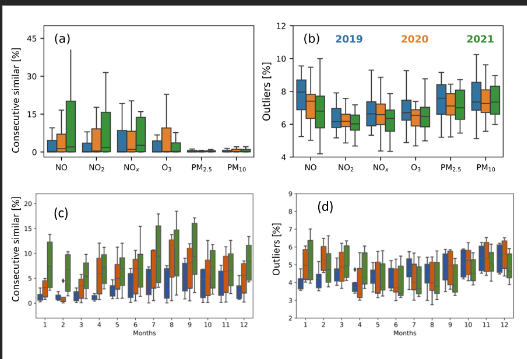 <br/> Reproduce this plot with new data

     year    site_id            variable      value Pollutant Cleaning_method
28   2019  site_5112     NO_consecutives   0.043325        NO    consecutives
29   2020  site_5112     NO_consecutives   0.286296        NO    consecutives
30   2021  site_5112     NO_consecutives   0.003491        NO    consecutives
31   2022  site_5112     NO_consecutives   0.028146        NO    consecutives
32   2023  site_5112     NO_consecutives   0.107316        NO    consecutives
146  2019  site_5112    NO2_consecutives   0.011034       NO2    consecutives
147  2020  site_5112    NO2_consecutives   0.027898       NO2    consecutives
148  2021  site_5112    NO2_consecutives   0.009888       NO2    consecutives
149  2022  site_5112    NO2_consecutives   0.439651       NO2    consecutives
150  2023  site_5112    NO2_consecutives   2.493608       NO2    consecutives
264  2019  site_5112    NOx_consecutives   0.054110       NOx    consecutives
265  2020  site_5112    NOx_consecutives   0.127248       NOx   

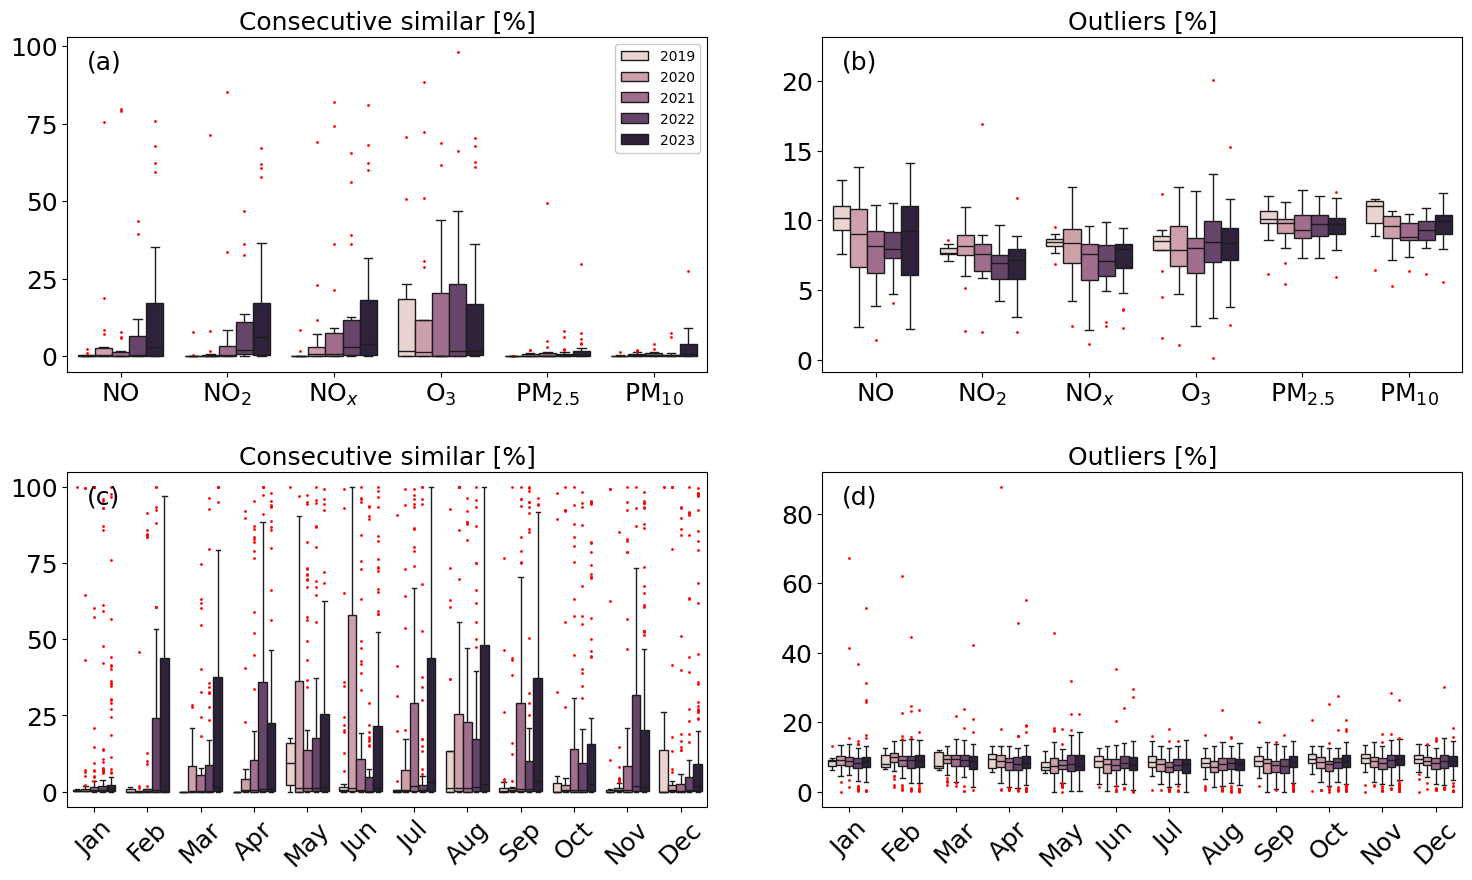

In [10]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
fig, ax = plt.subplots(2, 2, figsize=(18,10))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

# ========================= Similars by Pollutants =========================
count_var = pd.read_csv("Summary\summary_count_final.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100

per_df = t


melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=['NO_consecutives', 'NO2_consecutives',
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# {'year': 2019, 'site_id': 'site_168', 'variable': 'NO_consecutives', 
# 'value': 7.171562977039783, 'Pollutant': 'NO', 'Cleaning_method': 'consecutives'}

d = []  
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)
print(melt_df_1[melt_df_1['site_id'] == 'site_5112'])
    

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )


ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_title("Consecutive similar [%]", fontsize=18)
ax1.set_xlabel("Pollutants", fontsize=18)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# raise Exception


# ========================= Outliers by Pollutants =========================

melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

d = []
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax2, 
            x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = True,
            linewidth=1,
            flierprops=flierprops)

# ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_title("Outliers [%]", fontsize=18)
ax2.set_xlabel("Pollutants", fontsize=18)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))



# ========================= Similars by Month =========================
count_var = pd.read_csv("files/monthly_condensed_new.csv")
t = count_var.copy(deep=True)


lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100
# Now, _consecutives and _outliers are in percentage of data missing/removed.

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

d = []
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax3, 
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = True,
            linewidth=1,
            flierprops=flierprops )


# ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax3.set_title("Consecutive similar [%]", fontsize=18)
ax3.set_xlabel("Month", fontsize=18)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= Outliers by Month =========================

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

d = []
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax4,
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = True,
            linewidth=1,
            flierprops=flierprops)

# ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax4.set_title("Outliers [%]", fontsize=18)
ax4.set_xlabel("Month", fontsize=18)
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= PLOT ALL =========================
plt.subplots_adjust(wspace=0.18,
                    hspace=0.3)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax4.tick_params(labelsize=18)

plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,  backgroundcolor = 'none', fontsize=18)
ax2.set_ylim([ax2.get_ylim()[0], ax2.get_ylim()[1] * 1.1])
plt.text(.03, .96, '(b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(c)', ha='left', va='top', transform=ax3.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(d)', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none', fontsize=18)

fig.savefig(r'plots/figure_2_with_fliers.png', dpi=1200, bbox_inches="tight")

plt.show()

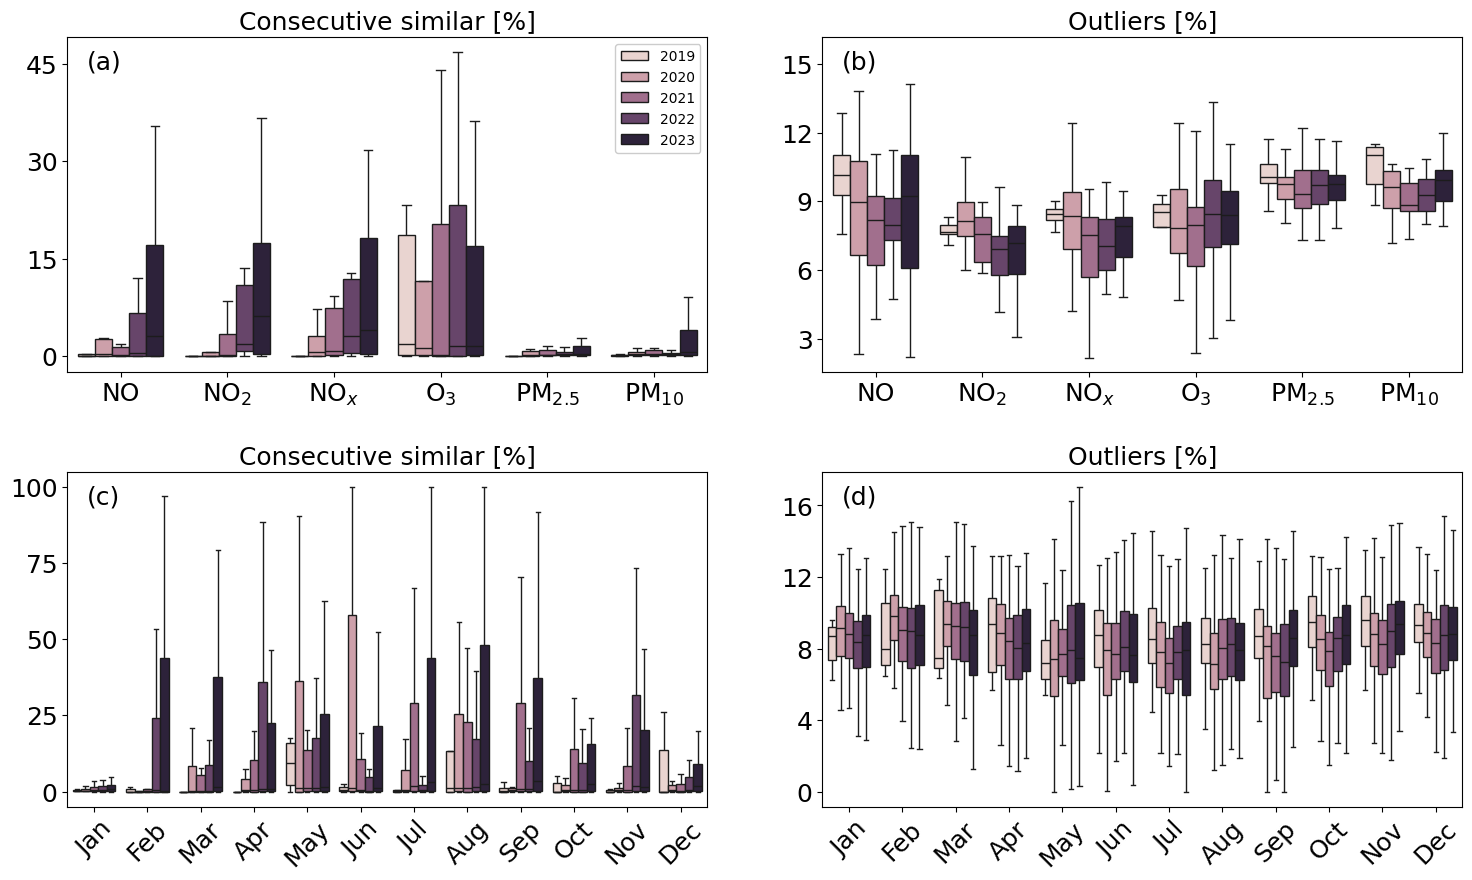

In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
fig, ax = plt.subplots(2, 2, figsize=(18,10))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

# ========================= Similars by Pollutants =========================
count_var = pd.read_csv("Summary\summary_count_final.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100

per_df = t


melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=['NO_consecutives', 'NO2_consecutives',
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# print(melt_df_1)

d = []
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)
# print(melt_df_1[melt_df_1['site_id'] == 'site_5112'])
    

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = False,linewidth=1,flierprops=flierprops )


ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_title("Consecutive similar [%]", fontsize=18)
ax1.set_xlabel("Pollutants", fontsize=18)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# raise Exception


# ========================= Outliers by Pollutants =========================

melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])
d = []
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax2, 
            x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)

# ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_title("Outliers [%]", fontsize=18)
ax2.set_xlabel("Pollutants", fontsize=18)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))



# ========================= Similars by Month =========================
count_var = pd.read_csv(r"files/monthly_condensed_new.csv")
t = count_var.copy(deep=True)


lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100
# Now, _consecutives and _outliers are in percentage of data missing/removed.

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# print(melt_df_1)
d = []
for row in melt_df_1.to_dict(orient='records'):
    site_pollutant_data = summary_mean[summary_mean['site_id'] == row['site_id']]
    if not site_pollutant_data.empty:
        if (row['Pollutant'] in ['NO', 'NO2', 'NOx']):
            if not site_pollutant_data['pollutant'].str.contains('NO2').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'Ozone':
            if not site_pollutant_data['pollutant'].str.contains('Ozone').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM25':
            if not site_pollutant_data['pollutant'].str.contains('PM25').iloc[0]:
                row['value'] = np.nan
        if row['Pollutant'] == 'PM10':
            if not site_pollutant_data['pollutant'].str.contains('PM10').iloc[0]:
                row['value'] = np.nan
    d.append(row)

melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax3, 
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops )


# ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax3.set_title("Consecutive similar [%]", fontsize=18)
ax3.set_xlabel("Month", fontsize=18)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= Outliers by Month =========================

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax4,
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)

# ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax4.set_title("Outliers [%]", fontsize=18)
ax4.set_xlabel("Month", fontsize=18)
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= PLOT ALL =========================


plt.subplots_adjust(wspace=0.18,
                    hspace=0.3)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax4.tick_params(labelsize=18)

plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,  backgroundcolor = 'none', fontsize=18)
ax2.set_ylim([ax2.get_ylim()[0], ax2.get_ylim()[1] * 1.1])
plt.text(.03, .96, '(b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(c)', ha='left', va='top', transform=ax3.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(d)', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none', fontsize=18)

fig.savefig(r'plots/figure_2_without_fliers.png', dpi=1200, bbox_inches="tight")

plt.show()

### Plot 2

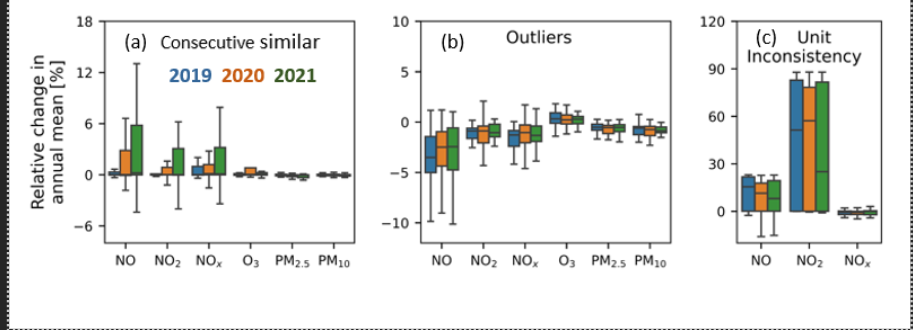

Reproduce this plot

In [12]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

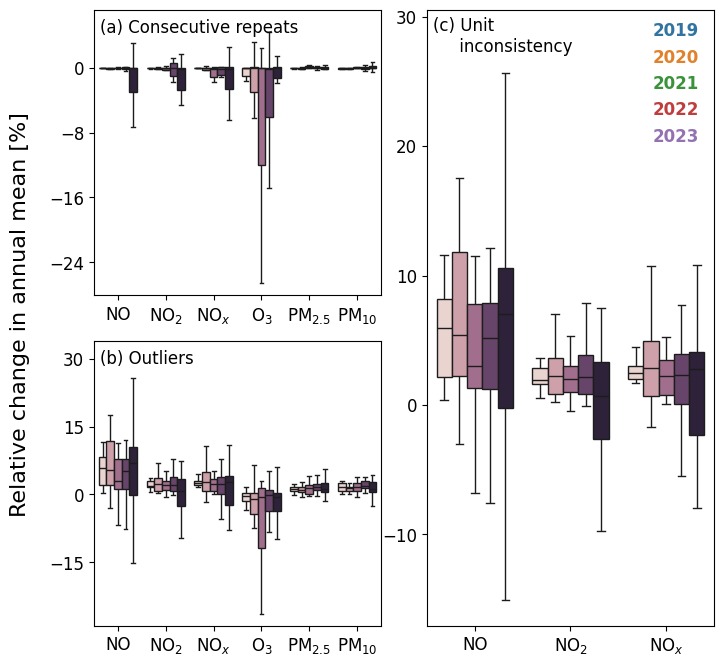

In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(nrows=2, ncols=2)

ax3 = fig.add_subplot(gs[0:1, 0:1])
ax4 = fig.add_subplot(gs[1:2, 0:1])
ax5 = fig.add_subplot(gs[:, 1:2])


plt.subplots_adjust(wspace=0.16,
                    hspace=0.16)


count_var = pd.read_csv(r"Summary/summary_mean_final.csv")
t = count_var
df = count_var


lst = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']
per_df = t
for name in lst:
    # t[name + '_consecutives'] = (t[name] - t[name+'_clean'])*100/t[name]
    # t[name + '_outliers'] = (t[name+'_outliers'] - t[name+'_clean'])*100/t[name+'_clean']
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)  
    t[name + '_consecutives'] = (t[name] - t[name + '_consecutives'])*100/t[name]
    t[name + '_outliers'] = (t[name] - t[name+'_outliers'])*100/t[name]

    if name[:2] == 'NO':
        per_df[name + '_Unit inconsistency'] =  (df[name]-df[name + '_CPCB'])/df[name + '_outliers']*100

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax3, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = False,linewidth=1,flierprops=flierprops )

ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
# ax3.set_ylabel("Relative change in " + "\n"+"annual mean [%]", fontsize=12)
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')
sns.boxplot(ax = ax4, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)


ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))




from matplotlib.patches import Rectangle
ax3.get_legend().remove()
ax4.get_legend().remove()


per_df = pd.read_csv(r"Summary/summary_mean_final.csv")
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] =  (per_df[name] - per_df[name + '_outliers'])*100/per_df[name]
melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_Unit inconsistency', 'NO2_Unit inconsistency', 
                                                            'NOx_Unit inconsistency'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

sns.boxplot(ax = ax5, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)


ax5.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$'])
ax5.set_ylabel("Outliers [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))



custom_lines = [Line2D([0], [0], color='#3274a1', lw=0),
                Line2D([0], [0], color='#e1812c', lw=0),
                Line2D([0], [0], color='#3a923a', lw=0),
                Line2D([0], [0], color='#c03d3e', lw=0),
                Line2D([0], [0], color='#9372b2', lw=0)]
legend_properties = {'weight':'bold'}
legend = ax5.legend(custom_lines, 
                    ['2019', '2020', '2021', '2022','2023'], 
                    labelcolor='linecolor',
                    loc=(0.6,0.77),
                    fontsize=10,
                    prop=legend_properties, 
                    ncols=1,
                    columnspacing=0)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')

# ax5.
# ax5.get_legend().remove()
ax3.set_ylabel("")
ax4.set_ylabel("")
ax5.set_ylabel("")

ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
fig.supylabel('Relative change in annual mean [%]', fontsize=16)

ax3.set_ylim([ax3.get_ylim()[0], ax3.get_ylim()[1] * 1.2])
ax4.set_ylim([ax4.get_ylim()[0], ax4.get_ylim()[1] * 1.2])
ax5.set_ylim([ax5.get_ylim()[0], ax5.get_ylim()[1] * 1.1])

plt.text(0.02, .97, '(a) Consecutive repeats', ha='left', va='top', transform=ax3.transAxes,  backgroundcolor = 'none')
plt.text(0.02, .97, '(b) Outliers', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none')
plt.text(0.02, .99, '(c) Unit \n     inconsistency', ha='left', va='top',transform=ax5.transAxes, backgroundcolor = 'none')

plt.savefig(r'plots/Geofigure_5.png', dpi=1200, bbox_inches="tight")

plt.show()

### PLOT 3

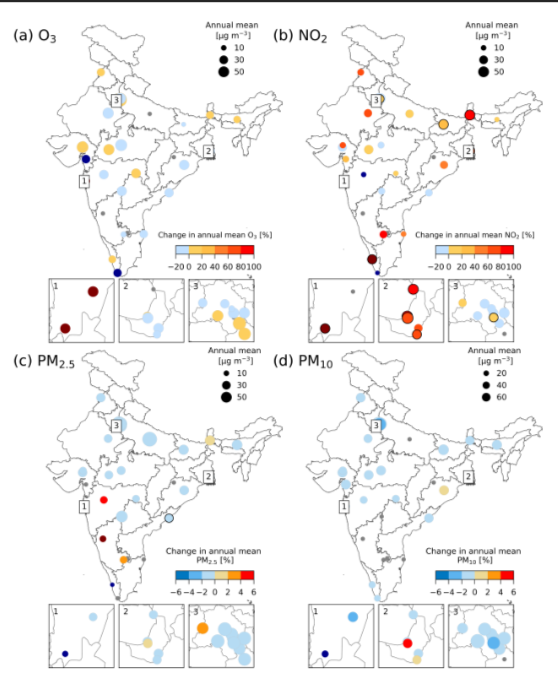 <br/>
Reproduce this plot

### Figure 1

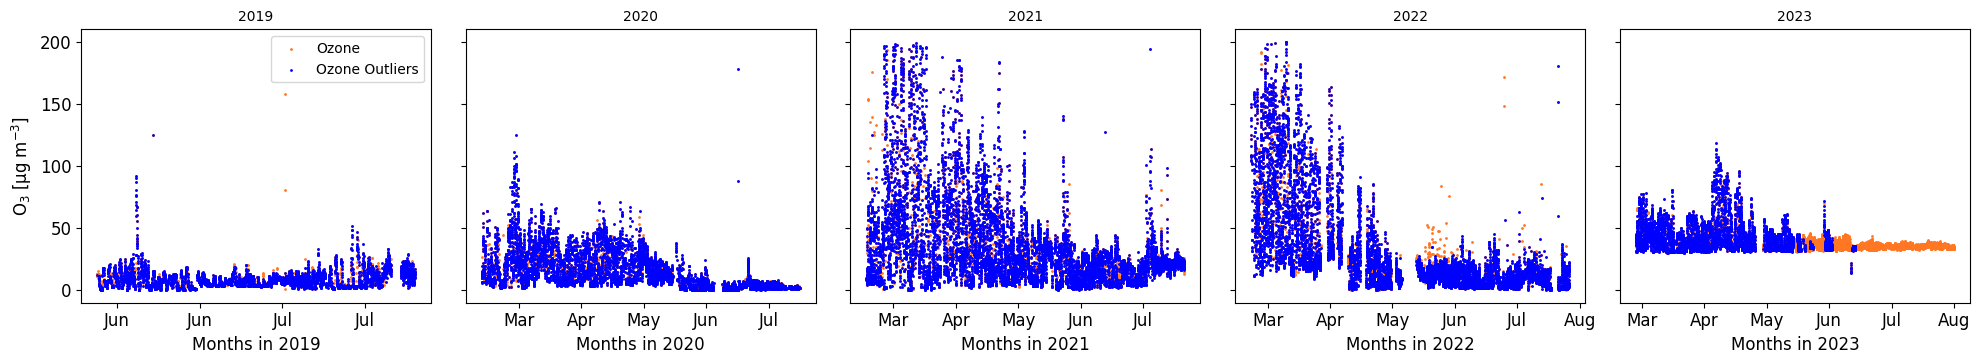

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i, year in enumerate(range(2019, 2024)):
    ax = axs[i]
    
    path = rf"data\After_Cleaning_Mumbai\site_5112_{year}.csv"
    local_df = pd.read_csv(path)

    local_df['Timestamp'] = pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
    local_df['Month'] = local_df['Timestamp'].dt.month

    year_data = local_df 
    year_data = local_df[(local_df['Month'] < 8) & (local_df['Month'] >= 3)]
    
    ax.scatter(year_data['Timestamp'], year_data['Ozone'], color='#FF7722', edgecolors='#FF7722', s=1, label='Ozone')
    ax.scatter(year_data['Timestamp'], year_data['Ozone_outliers'], color='blue', s=1, label='Ozone Outliers')
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_title(f"{year}", fontsize=10)
    
    if i == 0:
        ax.set_ylabel("O" + '$_{3}$' + ' [µg m' + '$^{-3}$' + ']')
    
    ax.set_xlabel("Months in " + str(year))

axs[0].legend(fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("plots/Ozone_outliers_plot_yearwise.png", dpi=1200, bbox_inches='tight')
plt.show()


posx and posy should be finite values


Year 2019:  (0, 49)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


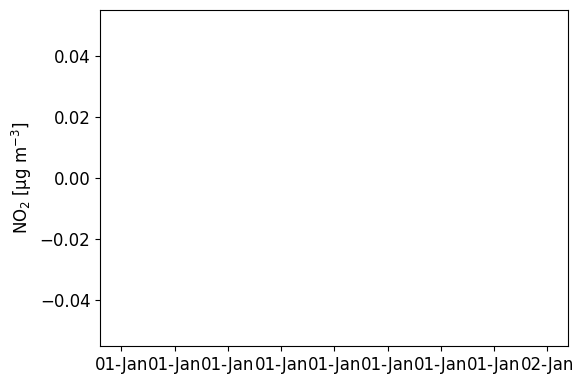

posx and posy should be finite values
posx and posy should be finite values


Year 2020:  (282, 49)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


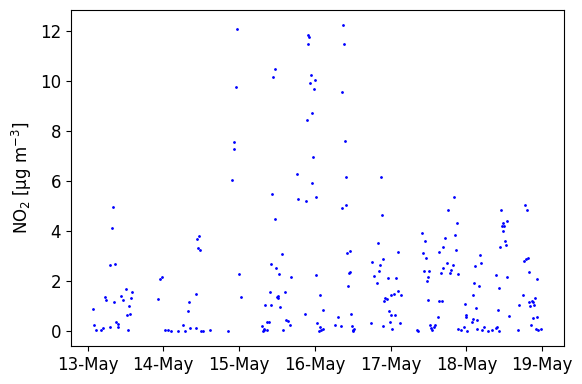

posx and posy should be finite values
posx and posy should be finite values


Year 2021:  (528, 49)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


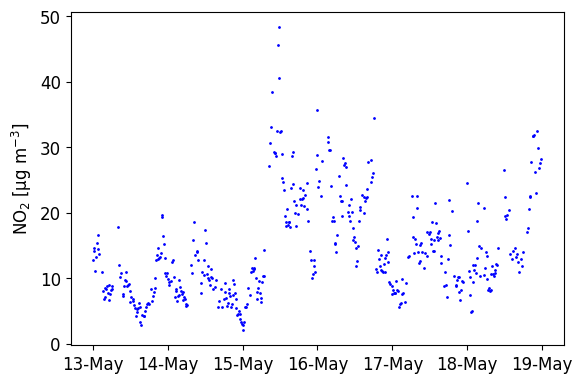

posx and posy should be finite values


Year 2022:  (0, 49)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


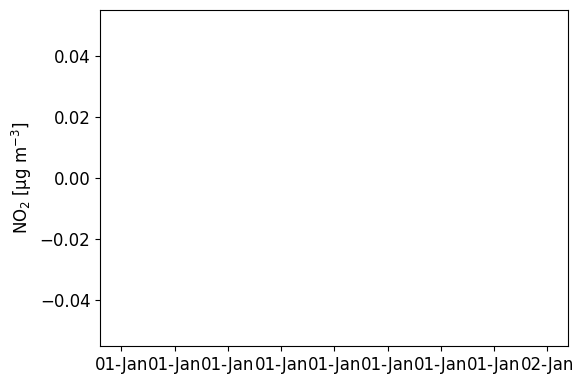

posx and posy should be finite values
posx and posy should be finite values


Year 2023:  (471, 49)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


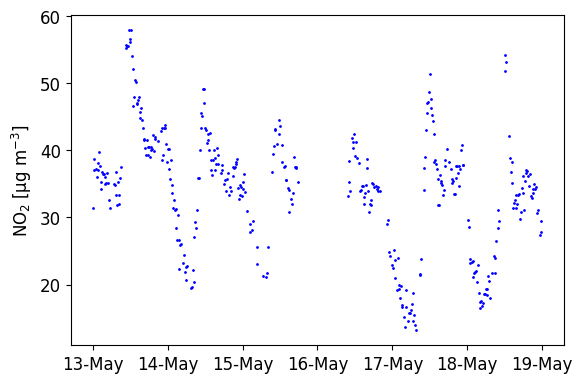

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

inset_ticks = 9

for year in range(2019, 2024):
    try:
        path = (f"data\After_Cleaning_Mumbai\site_5112_{year}.csv")
        local_df = pd.read_csv(path)
        fig, ax = plt.subplots(figsize=(6, 4))

        local_df['Timestamp'] = pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
        local_df = local_df.dropna(subset=['Timestamp', 'NO2'])
        local_df = local_df[np.isfinite(local_df['NO2'])]
        local_df['Month'] = local_df['Timestamp'].dt.month
        local_df['Day'] = local_df['Timestamp'].dt.day

        df = local_df[(local_df['Month'] == 5) & (local_df['Day'] > 12) & (local_df['Day'] < 19)]
        df['m'] = df['Timestamp'].dt.minute.astype(str)
        df['h'] = df['Timestamp'].dt.hour.astype(str)
        df['h_m'] = df['h'] + ":" + df['m'].replace("0", "00")

        df_1 = df[df['NO2'] > 100]
        df_1[['Timestamp', 'NO2', 'h_m']].apply(lambda row: ax.text(row['Timestamp'], row['NO2'], row['h_m'], fontsize=inset_ticks), axis=1)
        print(f"Year {year}: ", df.shape)
        ax.scatter(df['Timestamp'], df['NO2_CPCB'], color='b', s=1)
        ax.scatter(df_1['Timestamp'], df_1['NO2'], color='#08ff08', s=10, edgecolor='#08ff08', linewidth=0.5)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
        ax.set_ylabel("NO" + '$_{2}$' + ' [µg m' + '$^{-3}$' + ']')
        plt.tight_layout()
        plt.savefig(f"plots/{year}_NO2_CPCB_Scatter.png", dpi=1200, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(e)

In [ ]:
print(local_df.columns)

Index(['Timestamp', 'site_id', 'city', 'state', 'PM25', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'site_name', 'PM25_consecutives',
       'PM25_outliers', 'PM25_clean', 'PM10_consecutives', 'PM10_outliers',
       'PM10_clean', 'NOx_consecutives', 'NOx_outliers', 'NOx_clean',
       'NO2_consecutives', 'NO2_outliers', 'NO2_clean', 'NO_consecutives',
       'NO_outliers', 'NO_clean', 'Ozone_consecutives', 'Ozone_outliers',
       'Ozone_clean', 'error', 'NO_CPCB', 'NO2_CPCB', 'NOx_CPCB', 'Threshold',
       'Interesting', 'C1', 'C2', 'C4', 'C6', 'mismatch', 'year', 'Month',
       'Day'],
      dtype='object')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


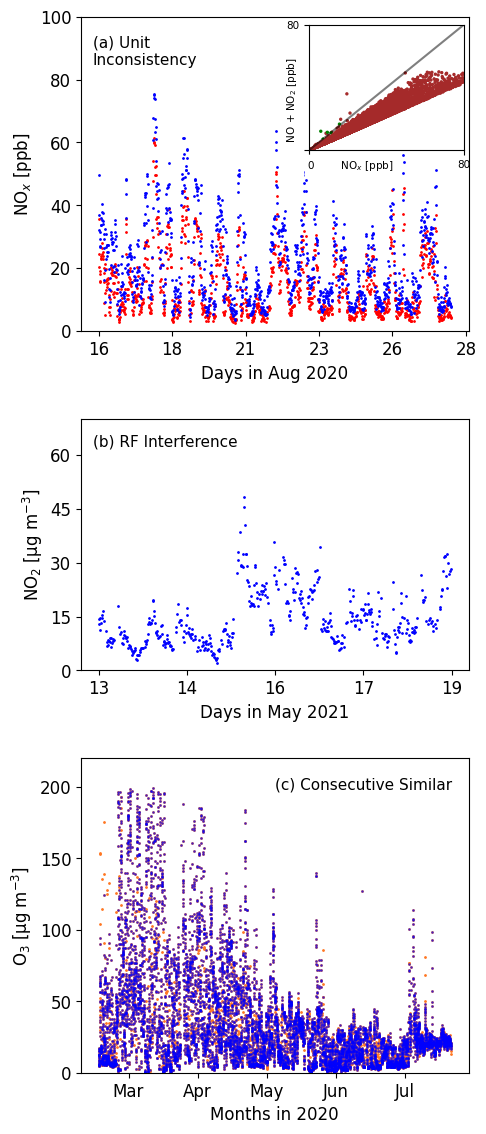

In [ ]:
fig, ax = plt.subplots(3,1, sharey=False,sharex=False,figsize=(5,12),gridspec_kw={'height_ratios': [2.5, 2, 2.5]})

path = r"data/After_Cleaning_Mumbai/site_5112_2021.csv"
local_df =  pd.read_csv(path)
local_df['dates'] = local_df['Timestamp']

# 2
local_df['dates']=pd.to_datetime(local_df['dates'], errors='coerce')
local_df = local_df[(local_df['dates'].dt.month <8) & (local_df['dates'].dt.month >= 3)]    
ax[2].scatter(local_df['dates'],local_df['Ozone'], color = '#FF7722',edgecolors='#FF7722', s=1)
ax[2].scatter(local_df['dates'],local_df['Ozone_outliers'], color = 'blue', s=1, alpha=0.5)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax[2].set_xlabel("Months in 2020")
ax[2].set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
for axis in ax:
    axis.xaxis.set_major_locator(plt.MaxNLocator(4))
    axis.yaxis.set_major_locator(plt.MaxNLocator(4))

# 1
local_df =  pd.read_csv(path)
local_df['dates'] = local_df['Timestamp']
local_df['dates']=pd.to_datetime(local_df['dates'], errors='coerce')
df = local_df
df = local_df[(local_df['dates'].dt.month == 5)&(local_df['dates'].dt.day >12)&(local_df['dates'].dt.day <19)]
df['time'] = df['dates'].dt.time
df['m'] = (np.asarray(df['dates'].dt.minute))
df['h'] = (np.asarray(df['dates'].dt.hour))
df[["m", "h"]] = df[["m", "h"]].astype(str) 
df['h_m'] = df['h'] +":"+ df['m'].replace("0","00") 
df['h_m']
df_1 = df[(df['NO2']>100)]
df_1[['dates','NO2','h_m']].apply(lambda row: ax[1].text(*row,fontsize=inset_ticks),axis=1)
ax[1].scatter(df['dates'],df['NO2_CPCB'], color = 'b', s= 1)
ax[1].scatter(df_1['dates'],df_1['NO2'], color = '#08ff08', s = 10, edgecolor = '#08ff08',linewidth= 0.5)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax[1].set_xlabel("Days in May 2021")
ax[1].set_ylabel("NO" + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')

# 0
local_df =  pd.read_csv(path)
local_df['dates'] = local_df['Timestamp']
local_df['dates']=pd.to_datetime(local_df['dates'], errors='coerce')
local_df = local_df[(local_df['dates'].dt.month == 8) & (local_df['dates'].dt.day >15) & (local_df['dates'].dt.day <28)]
ax[0].scatter(local_df['dates'],(local_df['NO2']/1.88 + local_df['NO']/1.23) , color = 'r', s =1)
ax[0].scatter(local_df['dates'],(local_df['NOx']) , color = 'b', s =1)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax[0].set_xlabel("Days in Aug 2020")
ax[0].set_ylabel("NO" + '$_{x}$'+ ' [ppb]')
ax[0].set_ylim([0,100])


for axis in ax:
#     axis.xaxis.set_tick_params(labelsize=12)
#     axis.yaxis.set_tick_params(labelsize=12)
    axis.xaxis.set_major_locator(plt.MaxNLocator(6))
    axis.yaxis.set_major_locator(plt.MaxNLocator(5))
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

# Adjust subplot spacing
fig.subplots_adjust(bottom=0.0, hspace=0.3)

# Add subplot labels
plt.text(.03, .94, '(a) Unit \nInconsistency', ha='left', va='top', transform=ax[0].transAxes, size=11, backgroundcolor='white', color='black')
plt.text(.03, .94, '(b) RF Interference',      ha='left', va='top', transform=ax[1].transAxes, size=11, backgroundcolor='white', color='black')
plt.text(.5, .94, '(c) Consecutive Similar',  ha='left', va='top', transform=ax[2].transAxes, size=11, backgroundcolor='white', color='black')

cmap = plt.cm.coolwarm
# from matplotlib.lines import Line2D
# legend = ax[2].legend([Line2D([0], [0], color='#ff7722', lw=0),
#               Line2D([0], [0], color='#21c721', lw=0),
#               Line2D([0], [0], color='#ff2f2f', lw=0)], 
#              ['Consecutive repeats ', 
#               '       RF interference', 
#               '    Inconsistent units'],facecolor = 'white',labelcolor='linecolor',
#              loc='upper right',framealpha =1, fancybox = False)
# frame = legend.get_frame()
# frame.set_color('white')
# frame.set_facecolor('white')
# frame.set_edgecolor('white')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Inset Axes for NOx measurement quality
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_label = 7.5
inset_ax = inset_axes(
    ax[0], loc='center right',
    height="50%", width="50%", 
    bbox_to_anchor=(0.21, 0.375, 0.8, 0.8), 
    bbox_transform=ax[0].transAxes
)
inset_ax.plot([0, 80], [0, 80], color='black', alpha=0.5, linewidth=1.5)

local_df =  pd.read_csv(path)
local_df['dates'] = local_df['Timestamp']
local_df['dates']=pd.to_datetime(local_df['dates'], errors='coerce')
t = inset_ax.text(-12.5,22,'         ' +"   " + '  ', size = inset_label, rotation=90, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10,"                         ", size = inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10,"                         ", size = inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))


local_df = local_df[(local_df['NO2']/1.88 + local_df['NO']/1.23) < 50]  
local_df['score'] = local_df['error'].apply(lambda x: 'brown' if not (x == 'C1' or x == 'UNIDENTIFIABLE')  else 'green')
local_df.to_csv("artifacts/local_df.csv")
inset_ax.scatter((local_df['NOx']), (local_df['NO2']/1.88 + local_df['NO']/1.23), color=local_df['score'], s = 2,alpha=1)
inset_ax.xaxis.set_tick_params(labelsize=inset_label)
inset_ax.yaxis.set_tick_params(labelsize=inset_label)
inset_ax.xaxis.set_major_locator(plt.MaxNLocator(1))
inset_ax.yaxis.set_major_locator(plt.MaxNLocator(1))

t = inset_ax.text(-12.5,22,'          NO +' +" NO" + '$_{2}$ [ppb]', size = inset_label, rotation=90, va='center')
t = inset_ax.text(1, -10,"         NO" + '$_{x}$ [ppb]', size = inset_label, va='center')
t = inset_ax.text(-1, -10,'0', size = inset_label, va='center')

ax[2].set_ylim([0,220])
ax[1].set_ylim([0,70])
inset_ax.set_xlim([0,80])
inset_ax.set_ylim([0,80])

inset_ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
inset_ax.xaxis.get_major_ticks()[0].label1.set_visible(False)

fig.savefig(r'plots/figure_1', dpi=1200, bbox_inches="tight")

### Figure 4

In [ ]:
summary_mean[summary_mean['errors'].str.contains('C1') & 
             summary_mean['pollutant'].str.contains('NO2') & 
            ((summary_count['C2'] - summary_count['NO2']) < 10) &
            (summary_mean['prevalent_error'].str.contains('C1') | summary_mean['prevalent_error'].str.contains('C1')) &
            (((summary_mean['NO2_CPCB'] - summary_mean['NO2_outliers']).abs()/summary_mean['NO2_outliers']) >= 0.2) &
            ((((summary_count['NO2_outliers']-summary_count['NO2_CPCB'])/summary_count['NO2_outliers']) - 0.5) < 0.3)
            ]

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,AQI_before_cleaning,AQI_after_cleaning,errors,prevalent_error,pollutant
67,17519.5,54.027802,146.200794,13.158951,15.115504,21.030836,25.519979,13.060818,0.734272,12.400987,54.898639,53.899569,53.899569,146.196432,143.367559,143.367559,21.014726,20.542679,20.542679,15.070694,14.631285,14.631285,13.160017,12.662035,12.662035,12.438826,12.033519,12.033519,13.667600,18.979139,20.770908,21.542679,-2.594728,6.652833,-0.248849,4.306955,346,2021,site_5392,Bandra_Kurla_Complex_Mumbai_IITM,141.235233,139.083158,"C1,C2,C4,C6,UNIDENTIFIABLE",C1,"PM25,PM10,NO2,Ozone"
68,17519.5,59.797708,128.397013,27.786995,52.469470,51.883572,51.624163,14.827900,1.509063,23.639896,59.802694,58.244551,58.244551,128.934888,125.613874,125.613874,69.480207,69.001297,69.001297,39.374669,38.861831,38.861831,41.867847,41.238676,41.238676,22.598883,22.397065,22.397065,42.228024,62.384165,66.217752,70.001297,-0.152321,35.728491,7.604570,27.971600,201,2022,site_5392,Bandra_Kurla_Complex_Mumbai_IITM,142.548756,130.027082,"C1,C2,C4,C6,UNIDENTIFIABLE",C1,"PM25,PM10,NO2,Ozone"
82,17519.5,37.714234,72.631972,7.407296,18.283405,14.165057,9.799080,3.298876,0.994238,31.212389,37.712741,36.551070,36.551070,72.627090,70.646295,70.646295,14.741981,14.156471,14.156471,18.525742,18.095065,18.095065,7.414949,7.317001,7.317001,31.214297,30.570388,30.570388,7.483962,21.829744,14.372669,15.156471,1.985659,12.395966,3.333735,11.047889,129,2021,site_5397,Khindipada-Bhandup_West_Mumbai_IITM,79.455038,76.140641,"C1,C2,C4,C6,UNIDENTIFIABLE",C1,"PM25,PM10,NO2,Ozone"
84,17519.5,67.480495,133.646982,6.190830,14.467128,11.624242,10.710521,8.933386,1.204728,49.666283,67.436596,65.090171,65.090171,133.544048,129.354015,129.354015,12.699939,12.399239,12.399239,16.633857,15.870142,15.870142,6.801691,6.791497,6.791497,49.671257,49.453347,49.453347,7.077068,20.705468,13.742301,13.399239,2.198757,12.621376,3.474553,11.345579,589,2023,site_5397,Khindipada-Bhandup_West_Mumbai_IITM,140.912713,137.305829,"C1,C2,C4,C6",C1,"PM25,PM10,NO2,Ozone"
97,17519.5,36.425345,112.154712,7.454592,15.060417,11.953948,7.627426,NaN,0.384320,16.553716,37.348462,36.505446,36.505446,112.213359,111.479067,111.479067,12.903663,12.671190,12.671190,15.202347,14.877650,14.877650,7.447727,7.357782,7.357782,16.554219,16.270096,16.270096,7.727816,18.490760,12.556635,13.671190,2.382415,11.603092,3.771305,10.214201,128,2021,site_5400,Borivali_East_Mumbai_IITM,111.671025,109.761600,"C1,C2,C4,C6,UNIDENTIFIABLE",C1,"PM25,PM10,NO2,Ozone"
106,17567.5,107.979619,132.641112,36.597409,25.060069,43.693014,60.187227,4.731565,0.806757,34.421802,108.254503,97.834115,97.834115,132.633351,130.782272,130.782272,43.693014,40.839330,40.839330,25.060069,20.637177,20.637177,36.597409,35.746746,35.746746,34.411935,35.668076,35.668076,37.674695,26.335817,39.848602,41.839330,-0.260321,16.019199,6.306416,9.452463,3,2020,site_5402,Malad_West_Mumbai_IITM,208.034964,197.159028,"C1,C2,C4,C6",C1,"PM25,PM10,NO2,Ozone"
107,17519.5,58.115919,112.445594,5.652517,15.491464,13.162574,6.193661,4.513744,0.826018,23.777991,58.089376,55.003868,55.003868,112.452594,104.997943,104.997943,13.385102,12.870933,12.870933,16.134527,15.445933,15.445933,5.653677,5.085102,5.085102,23.782606,24.237161,24.237161,5.426812,20.226690,12.532186,13.870933,-0.081511,8.159531,0.880011,7.198008,58,2021,site_5402,Malad_West_Mumbai_IITM,130.343532,123.603265,"C1,C2,C4,C6,UNIDENTIFIABLE",C1,"PM25,PM10,NO2,Ozone"


In [ ]:
summary_mean[summary_mean['errors'].str.contains('C1') & 
             summary_mean['pollutant'].str.contains('NO2') & 
             ~(summary_mean['errors'].str.contains('UNIDENTIFIABLE', na=False)) &
            ((summary_count['C2'] - summary_count['NO2']) < 10) &
            #  (summary_mean['prevalent_error'].str.contains('C1') | summary_mean['prevalent_error'].str.contains('C1')) &
             (((summary_mean['NO2_CPCB'] - summary_mean['NO2_outliers']).abs()/summary_mean['NO2_outliers']) >= 0.2) 
            # ((((summary_count['NO2_outliers']-summary_count['NO2_CPCB'])/summary_count['NO2_outliers']) - 0.5) < 0.3)
            #  summary_mean['site_name'].str.contains('', case=False)
             ]

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,AQI_before_cleaning,AQI_after_cleaning,errors,prevalent_error,pollutant
0,17519.5,30.966476,96.687774,35.005538,25.789987,60.610293,NaN,15.734958,2.260990,27.533963,30.963299,30.261509,30.261509,96.683707,94.303187,94.303187,62.424148,61.155526,61.155526,26.645606,26.348312,26.348312,35.239965,34.304005,34.304005,27.753478,28.456618,28.456618,42.358944,49.644965,60.842948,62.155526,-18.780163,0.028676,-12.337895,-6.413592,85,2019,site_168,Bandra_Mumbai_MPCB,94.716996,96.833133,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
1,17567.5,22.796492,59.785901,6.438245,9.603594,15.540890,NaN,19.592096,1.557501,16.168018,22.793001,22.380280,22.380280,59.502736,57.846013,57.846013,38.629190,38.785827,38.785827,30.621042,30.997174,30.997174,13.553719,13.001951,13.001951,28.466332,34.888971,34.888971,15.860508,67.257772,48.663638,39.785827,-19.133907,0.029671,-16.719761,-2.384475,959,2020,site_168,Bandra_Mumbai_MPCB,64.122772,66.540485,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
10,17519.5,44.542513,84.363565,20.345395,18.062205,38.369917,10.398959,11.953382,0.647997,6.290945,44.559494,43.145966,43.145966,84.408969,82.894354,82.894354,38.369886,37.604696,37.604696,18.080946,17.733557,17.733557,20.344797,20.033878,20.033878,10.931853,10.699928,10.699928,24.547613,32.124343,37.043009,38.604696,-11.725628,0.006519,-7.993560,-3.725549,15,2019,site_5102,Vasai_West_Mumbai_MPCB,100.633670,98.144998,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
12,17519.5,34.939508,143.635862,30.455724,27.091967,57.119222,11.843534,25.575037,1.092703,21.790000,34.117705,33.861081,33.861081,144.056737,144.361516,144.361516,57.117271,56.638273,56.638273,27.095458,26.835456,26.835456,30.441194,30.360033,30.360033,21.790000,21.790000,21.790000,35.061911,49.589595,54.874287,57.638273,-17.666393,0.012015,-12.335865,-5.318514,549,2021,site_5102,Vasai_West_Mumbai_MPCB,133.679843,137.130860,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
14,17519.5,35.985594,114.065235,49.615543,18.461074,67.689361,21.943027,10.673956,1.026544,33.230160,35.869480,35.845253,35.845253,114.197083,112.904796,112.904796,61.973112,61.534631,61.534631,15.327523,15.224950,15.224950,46.222387,45.899305,45.899305,32.931560,33.014330,33.014330,56.376606,30.839330,62.229110,62.534631,-16.223597,0.034162,-7.650933,-8.538502,62,2023,site_5102,Vasai_West_Mumbai_MPCB,107.944135,106.995445,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
15,17519.5,35.903406,88.165824,13.414114,19.501070,32.895190,6.792313,9.505010,0.617145,15.023816,35.929488,35.381462,35.381462,88.223644,87.265204,87.265204,32.898995,32.103532,32.103532,19.504793,19.137275,19.137275,13.415988,12.563673,12.563673,15.257387,15.101620,15.101620,15.349335,34.149274,30.641681,33.103532,-10.832786,0.004013,-8.499160,-2.329613,13,2019,site_5103,Nerul_Navi_Mumbai_MPCB,92.956581,92.284951,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
16,17567.5,59.868109,151.957528,23.665887,22.093212,45.466656,14.575680,8.250260,1.300748,27.486991,59.845360,59.655633,59.655633,152.059237,149.796296,149.796296,45.411550,44.404834,44.404834,22.065105,21.389108,21.389108,23.660840,23.140241,23.140241,28.028021,27.845674,27.845674,27.990548,38.389359,43.167767,45.404834,-13.802400,0.012464,-9.546812,-4.243124,206,2020,site_5103,Nerul_Navi_Mumbai_MPCB,162.565650,159.133592,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
17,17519.5,66.568221,162.468071,35.861783,15.536833,49.252660,11.879136,10.507794,0.911580,93.201530,65.747027,65.090615,65.090615,162.486378,159.148012,159.148012,49.227222,48.477180,48.477180,15.516380,15.162731,15.162731,35.841183,35.349004,35.349004,90.865749,90.740958,90.740958,43.065638,27.469583,49.591645,49.477180,-13.343172,

In [ ]:
summary_mean[summary_mean['site_id'].isin(sites_in_consideration['site_id'])].to_csv('summary_mean_sites.csv', index=False)

In [ ]:
summary_mean[summary_mean['site_name'].str.contains('MPCB', case=False)]

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,AQI_before_cleaning,AQI_after_cleaning,errors,prevalent_error,pollutant
0,17519.5,30.966476,96.687774,35.005538,25.789987,60.610293,NaN,15.734958,2.260990,27.533963,30.963299,30.261509,30.261509,96.683707,94.303187,94.303187,62.424148,61.155526,61.155526,26.645606,26.348312,26.348312,35.239965,34.304005,34.304005,27.753478,28.456618,28.456618,42.358944,49.644965,60.842948,62.155526,-18.780163,0.028676,-12.337895,-6.413592,85,2019,site_168,Bandra_Mumbai_MPCB,94.716996,96.833133,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
1,17567.5,22.796492,59.785901,6.438245,9.603594,15.540890,NaN,19.592096,1.557501,16.168018,22.793001,22.380280,22.380280,59.502736,57.846013,57.846013,38.629190,38.785827,38.785827,30.621042,30.997174,30.997174,13.553719,13.001951,13.001951,28.466332,34.888971,34.888971,15.860508,67.257772,48.663638,39.785827,-19.133907,0.029671,-16.719761,-2.384475,959,2020,site_168,Bandra_Mumbai_MPCB,64.122772,66.540485,"C1,C2,C4,C6",C2,"PM25,PM10,NO2,Ozone"
2,17519.5,35.657979,94.886973,45.489024,10.334039,54.045184,NaN,28.848964,0.754519,42.427046,34.205844,40.523089,40.523089,93.699581,106.134674,106.134674,60.717272,61.918694,61.918694,26.700217,29.820122,29.820122,61.720861,62.725692,62.725692,53.696560,53.697305,53.697305,73.019645,24.402854,71.838710,62.918694,-13.939388,4.602674,-2.575987,-6.760727,163,2021,site_168,Bandra_Mumbai_MPCB,102.000925,115.629460,"C1,C2,C4,C6,UNIDENTIFIABLE",C2,"PM25,PM10,NO2,Ozone"
3,17519.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022,site_168,Bandra_Mumbai_MPCB,NaN,NaN,NaN,NaN,"PM25,PM10,NO2,Ozone"
4,17519.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,site_168,Bandra_Mumbai_MPCB,NaN,NaN,NaN,NaN,"PM25,PM10,NO2,Ozone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,17519.5,38.946279,83.884056,8.757656,23.607173,20.405841,22.679030,7.200849,0.656352,26.725954,39.121541,38.524163,38.524163,83.572982,83.392264,83.392264,20.763967,20.057277,20.057277,23.996985,23.492064,23.492064,8.831500,7.929163,7.929163,26.961857,26.835077,26.835077,8.231948,24.118064,18.757371,21.057277,-0.770276,10.905217,0.677330,9.457611,48,2023,site_5807,Mindspace-Malad_West_Mumbai_MPCB,88.929804,87.385680,"C1,C2,C4,C6,UNIDENTIFIABLE",C4,"PM25,PM10,NO2,Ozone"
129,17519.5,40.110251,98.787407,17.869304,33.011621,33.062395,44.509248,3.901020,0.708321,24.439236,39.584587,39.518515,39.518515,98.063393,97.466500,97.466500,33.064241,31.908937,31.908937,33.042182,32.851231,32.851231,17.868700,16.434740,16.434740,24.396697,24.425093,24.425093,16.806602,34.523660,31.312760,32.908937,-1.120406,16.757936,1.954846,13.682685,270,2023,site_5810,Bandra_Kurla_Complex_Mumbai_MPCB,100.451044,98.163028,"C1,C4,C6",C1,"PM25,PM10,NO2,Ozone"
130,17519.5,42.909194,87.583900,7.119487,30.678017,21.282871,8.330437,4.143892,0.666397,22.115168,41.759788,40.742177,40.742177,82.916085,81.898209,81.898209,21.283020,20.708663,20.708663,30.679329,30.124232,30.124232,7.116794,6.464607,6.464607,22.240952,22.119599,22.119599,6.382099,29.177357,19.735714,21.708663,0.932997,15.764993,2.120671,14.577319,271,2023,site_5811,Chembur_Mumbai_MPCB,95.034810,86.910704,"C1,C2,C4,C6",C1,"PM25,PM10,NO2,Ozone"
131,17519.5,41.342218,89.841545,32.174404,24.929409,48.073521,50.965136,19.605350,0.575458,18.097676,40.588128,40.286064,40.286064,89.191737,89.089468,89.08946

(35039, 44) (1, 44)


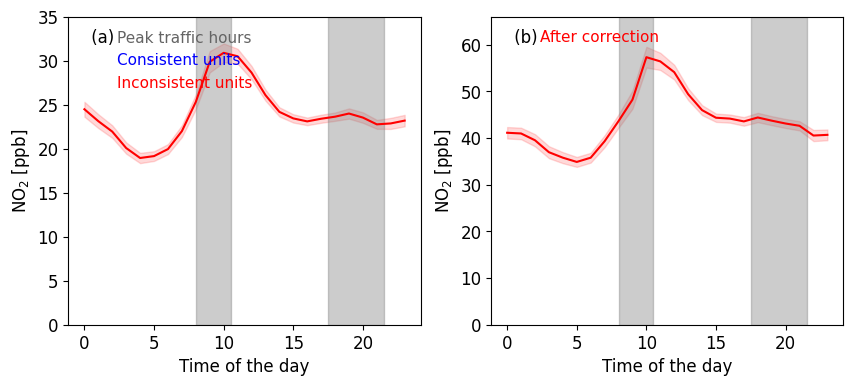

In [ ]:
# %load_ext autoreload
# %autoreload 2

from matplotlib.lines import Line2D
from scripts.plot_diurnal import get_diurnal

path = (r"data\After_Cleaning_Mumbai\site_5112_2022.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
# local_df = local_df[local_df['dates'].dt.month.isin(month)]

fig, ax = plt.subplots(1,2, sharey=False, sharex=True, figsize=(10,4))
pol = 'NO2'

local_df1 = local_df[((local_df['error'] != 'C1') )]
local_df2 = local_df[((local_df['error'] == 'C1'))]
print(local_df1.shape, local_df2.shape)

# before correction
get_diurnal(local_df1, pol, 'red', 'title', ax[0])
get_diurnal(local_df2, pol, 'blue', 'title', ax[0])
# after correction
get_diurnal(local_df, pol+'_CPCB', 'red', 'title', ax[1])
get_diurnal(local_df2, pol+'_CPCB', 'blue', 'title', ax[1])

plt.text(.05, .96, ' (a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'none')
plt.text(.05, .96, ' (b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')

ax[0].set_xlabel("Time of the day")
ax[0].legend(title = 'Before unit correction', labels = ['Inconsistent unit','Consistent unit'],frameon=False)
ax[0].legend(labels = ['Inconsistent unit','Consistent unit'], frameon=False)
ax[1].legend(title = 'After unit correction', labels = ['Inconsistent unit','Consistent unit'], frameon=False)
ax[1].legend(labels = ['After correction','Consistent unit'],frameon=False)

ax[0].set_ylabel("NO" + '$_{2}$' + ' [ppb]')
ax[1].set_ylabel("NO" + '$_{2}$' + ' [ppb]')
ax[1].set_xlabel("Time of the day")

plt.subplots_adjust(wspace=0.2, hspace=0.25)

legend = ax[0].legend([Line2D([0], [0], color='#646464', lw=0),Line2D([0], [0], color='#0000fd', lw=0),
              Line2D([0], [0], color='#ff0000', lw=0)], 
             ['Peak traffic hours','Consistent units', 
              'Inconsistent units'],facecolor = 'white',labelcolor='linecolor', 
             loc=(0,0.74),framealpha =0, fancybox = False, fontsize = 11)

legend = ax[1].legend([Line2D([0], [0], color='#ff0000', lw=0)], 
             ['After correction'],facecolor = 'white',labelcolor='linecolor', 
             loc=(0,0.89),framealpha =0, fancybox = False,  fontsize = 11)
                
ax[0].axvspan(8, 10.5, alpha=0.4, color='grey')
ax[0].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')

ax[1].axvspan(8, 10.5, alpha=0.4, color='grey')
ax[1].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')
 
# ax[1].set_ylim([-1000,1000])

plt.savefig(f'plots/Figure_4.png', dpi=1200, bbox_inches="tight")
plt.show()

### Graphical Abstract

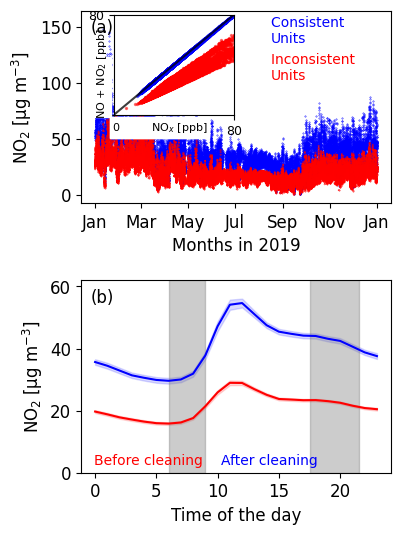

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scripts.plot_diurnal import get_diurnal
fig, axs = plt.subplots(2, 1, figsize=(4, 6))

# Paths to the CSV files
path1 = r"data\After_Cleaning_Mumbai\site_5112_2023.csv"
path2 = r"data\After_Cleaning_Mumbai\site_5112_2023.csv"
path = r"data\After_Cleaning_Mumbai\site_5112_2023.csv"

local_df = pd.read_csv(path1)

local_df['Timestamp'] = pd.to_datetime(local_df['Timestamp'], errors='coerce')
local_df['score'] = local_df['error'].apply(lambda x: '#0000fd' if (x == 'C1') else '#ff0000')

ax2 = axs[1]
ax1 = axs[0]
pol = 'NO2'
get_diurnal(local_df, pol,         'red',  'title', ax2)
get_diurnal(local_df, pol+'_CPCB', 'blue', 'title', ax2)

local_df = pd.read_csv(path2)
local_df['Timestamp'] = pd.to_datetime(local_df['Timestamp'], errors='coerce')
local_df['score'] = local_df['error'].apply(lambda x: '#0000fd' if (x == 'C1') else '#ff0000')
ax1.set_xlabel("Months in 2019")

# ax2.set_ylim([0,120])
# ax2.get_legend().remove()
ax2.set_xlabel("Time of the day")
ax1.scatter(local_df['Timestamp'], (local_df['NO2_outliers']), color='red', s=0.1)
ax1.scatter(local_df['Timestamp'], (local_df['NO2_CPCB']), color='blue', s=0.1)
ax1.scatter(local_df['Timestamp'], (local_df['NO2']), color=local_df['score'], s=0.1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,backgroundcolor = 'none')
plt.text(.03, .96, '(b)', ha='left', va='top', transform=ax2.transAxes,backgroundcolor = 'none')

legend = ax1.legend([Line2D([0], [0], color='#0000fd', lw=0),
                     Line2D([0], [0], color='#ff0000', lw=0)],
                    ['Consistent \nUnits',
                     'Inconsistent \nUnits'], facecolor='white', labelcolor='linecolor',
                    loc=(0.47, 0.6), framealpha=0, fancybox=False, fontsize=10)

legend = ax2.legend([Line2D([0], [0], color='#ff0000', lw=0),
                     Line2D([0], [0], color='#0000fd', lw=0)],
                     ['Before cleaning',
                     'After cleaning'], 
                     facecolor='white', 
                     labelcolor='linecolor',
                     loc=(-0.1,0), 
                     framealpha=0, 
                     fancybox=False,
                     ncols=2,
                     columnspacing=-1.5, 
                     fontsize=10)

ax2.axvspan(6, 9, alpha=0.4, color='grey')
ax2.axvspan(17.5, 21.5, alpha=0.4, color='grey', label='Peak traffic hours')


inset_label = 8
inset_ticks = 9
inset_ax = inset_axes(ax1,
                      height=1,  # set height
                      width=1.2, loc='center left',
                      bbox_to_anchor=(0.08, 0.32, 0.8, 0.8),
                      bbox_transform=ax1.transAxes)
inset_ax.plot([0, 80], [0, 80], color='black', alpha=0.76, linewidth=1.5)

local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M", errors='coerce')
t = inset_ax.text(-12.5, 22, '         ' + "   " + '  ',
                  size=inset_label, rotation=90, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10, "                         ",
                  size=inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10, "                         ",
                  size=inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))


# local_df = local_df[local_df['NOx_CPCB'] < 80]
local_df = local_df[(local_df['NO2']/1.88 + local_df['NO']/1.23) < 80]
#
# inset_ax.scatter((local_df['NOx']), (local_df['NO2']/1.88 + local_df['NO']/1.23), color=local_df['score'], s=2, alpha=0.5)
inset_ax.scatter((local_df['NOx']), (local_df['NO2']/1.88 + local_df['NO']/1.23), color='red', s=2, alpha=0.5)
inset_ax.scatter((local_df['NOx_CPCB']), (local_df['NO2_CPCB']/1.88 + local_df['NO_CPCB']/1.23), color='blue', s=2, alpha=0.5)

inset_ax.xaxis.set_tick_params(labelsize=inset_ticks)
inset_ax.yaxis.set_tick_params(labelsize=inset_ticks)
inset_ax.xaxis.set_major_locator(plt.MaxNLocator(1))
inset_ax.yaxis.set_major_locator(plt.MaxNLocator(1))


inset_ax.text(-12.5, 22, '        NO +' + " NO" +
              '$_{2}$ [ppb]', size=inset_label, rotation=90, va='center')
inset_ax.text(1, -10, "          NO" +
              '$_{x}$ [ppb]', size=inset_label, va='center')
inset_ax.text(-1, -10, '0', size=inset_label, va='center')


# ax[2].set_ylim([0,80])
inset_ax.set_xlim([0, 80])
inset_ax.set_ylim([0, 80])
inset_ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

inset_ax.xaxis.get_major_ticks()[0].label1.set_visible(False)


ax1.set_ylabel('NO' + '$_{2}$' + ' [µg m' + '$^{-3}$' + ']')
ax2.set_ylabel('NO' + '$_{2}$' + ' [µg m' + '$^{-3}$' + ']')
ax1.title.set_size(11)
ax2.title.set_size(11)
fig.subplots_adjust(hspace=0.4, wspace=-1)

# ax1.set_ylim([-10,800])
# ax2.set_ylim([0,150])

# ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
# ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
local_df.to_csv("artifacts/local_df2.csv")

fig.savefig(r'plots/Figure_ga_sideplot.png', dpi=300)
plt.show()

In [ ]:
summary_mean_mapping_2023

,site_id,PM10,PM10_clean,site_name,lat,lon,PM10_clean_count,PM10_DA,year,PM10_count,PM10_DA_before,timestamp_count,percentage_change,compliance_change_non_to_compl,compliance_change_compl_to_non,compliance_change,pollutant_before_cleaning_mass_conc,pollutant_after_cleaning,pollutant
0,site_168,NaN,NaN,Bandra_Mumbai_MPCB,19.062700,72.846140,NaN,0.000000,2023,NaN,0.000000,NaN,NaN,False,False,False,NaN,NaN,PM10
1,site_5104,157.192725,152.594720,Kurla_Mumbai_MPCB,19.086300,72.888800,25456.0,72.648402,2023,28778.0,82.128995,35040.0,-2.925075,False,False,False,157.192725,152.594720,PM10
2,site_5106,125.470986,121.876867,Vile_Parle_West_Mumbai_MPCB,19.108610,72.836220,23865.0,68.107877,2023,26884.0,76.723744,35040.0,-2.864502,False,False,False,125.470986,121.876867,PM10
3,site_5107,129.765799,129.144960,Chhatrapati_Shivaji_Intl._Airport_(T2)_Mumbai_...,19.100780,72.874620,29384.0,83.858447,2023,32405.0,92.480023,35040.0,-0.478431,False,False,False,129.765799,129.144960,PM10
4,site_5119,119.184599,117.925857,Sion_Mumbai_MPCB,19.047000,72.874600,28296.0,80.753425,2023,31946.0,91.170091,35040.0,-1.056128,False,False,False,119.184599,117.925857,PM10
5,site_5392,149.721087,143.687142,Bandra_Kurla_Complex_Mumbai_IITM,19.053536,72.846430,16084.0,45.901826,2023,24102.0,68.784247,35040.0,-4.030124,False,False,False,149.721087,143.687142,PM10
6,site_5399,100.905391,99.502667,Chakala-Andheri_East_Mumbai_IITM,19.110740,72.860840,24486.0,69.880137,2023,26957.0,76.932078,35040.0,-1.390138,True,False,True,100.905391,99.502667,PM10
7,site_5810,98.787407,97.466500,Bandra_Kurla_Complex_Mumbai_MPCB,19.065931,72.862131,15375.0,43.878425,2023,17362.0,49.549087,35040.0,-1.337121,False,False,False,98.787407,97.466500,PM10
8,site_5811,87.583900,81.898209,Chembur_Mumbai_MPCB,19.036458,72.895437,14411.0,41.127283,2023,17005.0,48.530251,35040.0,-6.491708,False,False,False,87.583900,81.898209,PM10
9,site_5814,89.841545,89.089468,Kherwadi_Bandra_East_Mumbai_MPCB,19.063214,72.845632,15699.0,44.803082,2023,17848.0,50.936073,35040.0,-0.837114,False,False,False,89.841545,89.089468,PM10


In [ ]:
plt.figure(figsize=(1,3))
pol = 'NO2'
summary_mean_mapping_2023 = pd.read_csv('Summary/2023_summary_mapping.csv').drop_duplicates()
summary_mean_mapping_2019 = pd.read_csv('Summary/2019_summary_mapping.csv').drop_duplicates()

df = deepcopy(summary_mean_mapping_2023[summary_mean_mapping_2023['pollutant'] == pol])
df = df[(df['Ozone_DA'] > 50) & (df['Ozone_DA_before'] > 75)]
df = df[df['year'].isin([2020,2021,2022,2019,2023])]
COMPLIANCE_THRESHOLD = 40 if pol in ['NO2','PM25'] else 100
df['Before'] = np.where(df['Ozone'] > COMPLIANCE_THRESHOLD, 1, 0)
df['After'] = np.where(df['Ozone_clean'] > COMPLIANCE_THRESHOLD, 1, 0)
df = df.groupby('site_id').agg({'Before':'sum', 'After':'sum'}).reset_index()
print(df)
non_compliant_before = df['Before'].sum()
non_compliant_after = df['After'].sum()
labels = ['Before Cleaning', 'After Cleaning']
counts = [non_compliant_before, non_compliant_after]
print(non_compliant_after, non_compliant_before)
plt.bar(labels, counts, color=['red', 'blue'], width=0.4, align='center')
plt.axis('off')
plt.savefig('Plots/compliance.png', dpi=300, bbox_inches="tight")
plt.show()

KeyError: 'Ozone_DA'

<Figure size 100x300 with 0 Axes>

In [ ]:
#Non Compliance for NO2
df = deepcopy(summary_mean_map_plot[summary_mean_map_plot['pollutant'] == pol])


#### Just plot diel variability for all the sites in maroon in panel C (annual NO2 change exceeding 100%) and we choose one from there.

In [ ]:
summary_mean_map_plot

,site_id,year,pollutant,Pollutant_Uncleaned,Pollutant_Cleaned,Percentage_change,compliance_change
0,site_103,2019,Ozone,31.770557,31.578901,-0.6033,False
1,site_105,2019,Ozone,29.964276,28.822603,-3.8101,False
2,site_106,2019,Ozone,21.763485,21.478687,-1.3086,False
3,site_107,2019,Ozone,29.441430,29.240682,-0.6819,False
4,site_108,2019,Ozone,39.820381,40.278350,1.1501,False
...,...,...,...,...,...,...,...
4287,site_5403,2023,PM10,117.257422,74.626557,-36.3566,True
4288,site_5404,2023,PM10,87.662813,87.073558,-0.6722,False
4289,site_5417,2023,PM10,121.001814,119.497080,-1.2436,False
4290,site_5421,2023,PM10,81.184150,80.892575,-0.3592,False


In [ ]:
interesting_sites = summary_mean_map_plot[(summary_mean_map_plot['Percentage_change'] > 100) & summary_mean_map_plot['pollutant'].str.contains('NO2')]
interesting_sites = pd.merge(interesting_sites, summary_count, on = ['site_id','year'], how = 'left')
interesting_sites.drop_duplicates(['site_id', 'year'], inplace = True)
interesting_sites = interesting_sites[interesting_sites['NO2_CPCB'] > (interesting_sites['NO2'] * 0.75)]

In [ ]:
interesting_sites

,site_id,year,pollutant,Pollutant_Uncleaned,Pollutant_Cleaned,Percentage_change,compliance_change,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,site_name,prevalent_error,errors,Percent_Coverage
87,site_5394,2023,NO2,83.790568,178.263511,112.7489,False,35040.0,30506.0,30366.0,28477.0,28978.0,28927.0,28667.0,27636.0,32192.0,30949.0,30035.0,27261.0,27261.0,29989.0,27322.0,27322.0,28926.0,26452.0,26452.0,28891.0,26676.0,26676.0,28474.0,25427.0,25427.0,30926.0,28160.0,28160.0,23225.0,23225.0,23225.0,26452.0,23275.0,23275.0,23275.0,23275.0,498.0,Mazgaon_Mumbai_IITM,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",66.281393


In [ ]:
from scripts.plot_diurnal import get_diurnal
import gc

def draw_diurnal(ax, df:pd.DataFrame,path: str, percentage:float = 0):
   pol = 'NO2'
   get_diurnal(df, pol, 'red', 'title', ax)
   get_diurnal(df, pol+'_CPCB', 'blue', 'title', ax)
   ax.set_xlabel("Time of the day")                  

   ax.axvspan(6, 9, alpha=0.4, color='grey')
   ax.axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')

   ax.set_ylabel('NO' + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')
   fig.suptitle(path.split('\\')[-1].split('.')[0] + f" | %Change: {percentage:.2f}%")
   ax.title.set_size(8)
   fig.subplots_adjust(hspace=0.4, wspace=-1)

   plt.savefig(f"plots\DIURNAL_{site['site_id']}_{site['year']}.png", dpi=400, bbox_inches="tight")

interesting_sites = summary_mean_map_plot[(summary_mean_map_plot['Percentage_change'] > 100) & summary_mean_map_plot['pollutant'].str.contains('NO2')]
interesting_sites = pd.merge(interesting_sites, summary_count, on = ['site_id','year'], how = 'left')
interesting_sites = interesting_sites[(interesting_sites['NO2'] - interesting_sites['NO2_CPCB'])/interesting_sites['NO2'] > 0.75]
interesting_sites.drop_duplicates(subset=['site_id','year'], keep='first', inplace=True)
print(len(interesting_sites))

for idx, site in enumerate(interesting_sites.to_dict(orient='records')):
   path = f"data/After_Cleaning_Mumbai/{site['site_id']}_{site['year']}.csv"
   print(f'{idx:04}',path)
   local_df =  pd.read_csv(path, low_memory=False)
   local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S")
   fig, axs = plt.subplots(1,1,figsize=(4,3))
   draw_diurnal(axs, local_df, path, site['Percentage_change'])


0


### Show Sites

In [ ]:
import geopandas as gpd
geodf = gpd.read_file('files/shapefiles/india_state_original.geojson')
geodf

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((95.23392 26.68246, 95.23282 26.70579..."
1,Assam,"POLYGON ((95.19465 27.03132, 95.15008 26.99934..."
2,Chandigarh,"POLYGON ((76.83806 30.75487, 76.83301 30.73887..."
3,Karnataka,"POLYGON ((77.55144 18.29191, 77.57026 18.29252..."
4,Manipur,"POLYGON ((94.67545 25.44561, 94.67293 25.42398..."
5,Meghalaya,"POLYGON ((92.42522 25.02966, 92.40163 25.03363..."
6,Mizoram,"POLYGON ((93.0087 24.41178, 93.02462 24.39255,..."
7,Nagaland,"POLYGON ((95.19465 27.03132, 95.19717 27.00183..."
8,Punjab,"POLYGON ((76.77673 30.90429, 76.78433 30.87791..."
9,Rajasthan,"POLYGON ((74.52716 29.94279, 74.51002 29.90819..."


In [ ]:
geodf['ST_NM'].unique()

array(['Arunachal Pradesh', 'Assam', 'Chandigarh', 'Karnataka', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tripura', 'Uttarakhand', 'Telangana', 'Bihar', 'Kerala',
       'Madhya Pradesh', 'Andaman & Nicobar', 'Gujarat', 'Lakshadweep',
       'Odisha', 'Dadra and Nagar Haveli and Daman and Diu', 'Ladakh',
       'Jammu & Kashmir', 'Chhattisgarh', 'Delhi', 'Goa', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'Tamil Nadu', 'Uttar Pradesh',
       'West Bengal', 'Andhra Pradesh', 'Puducherry', 'Maharashtra'],
      dtype=object)

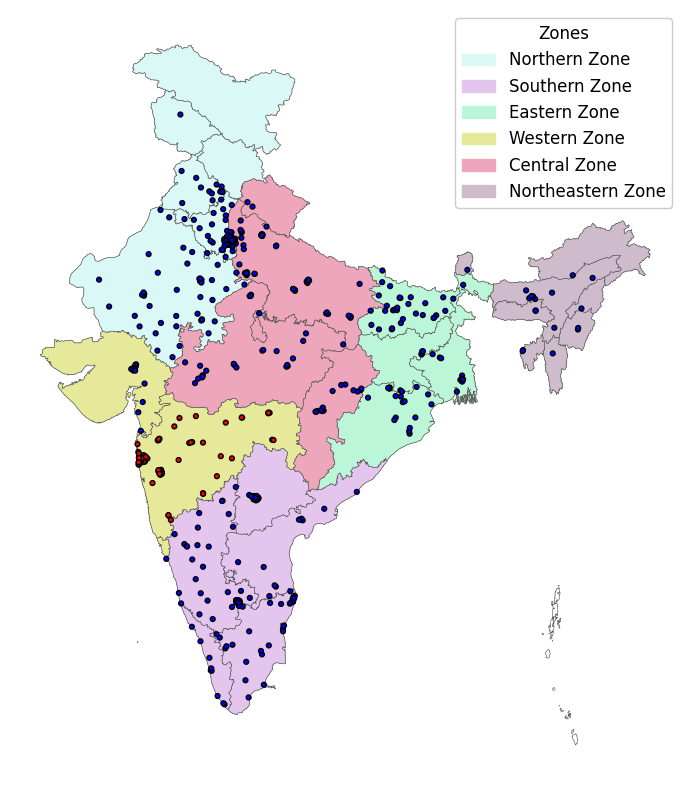

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1,1,figsize=(10,10))
geodf.plot(ax = ax, color='white', linewidth=.4,edgecolor='#545454')
northern_zone = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana','Delhi', 'Rajasthan','Ladakh']
southern_zone = ['Karnataka', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Telangana']
eastern_zone = ['West Bengal', 'Bihar', 'Jharkhand', 'Odisha']
western_zone = ['Maharashtra', 'Gujarat', 'Goa']
central_zone = ['Madhya Pradesh', 'Chhattisgarh','Uttar Pradesh','Uttarakhand']
northeastern_zone = ['Assam', 'Sikkim', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh', 'Meghalaya']
# zones = [northern_zone, southern_zone, eastern_zone, western_zone, central_zone, northeastern_zone]
zones = {
    'Northern Zone': northern_zone,
    'Southern Zone': southern_zone,
    'Eastern Zone': eastern_zone,
    'Western Zone': western_zone,
    'Central Zone': central_zone,
    'Northeastern Zone': northeastern_zone
}
colors = {
    'Northern Zone': '#daf8f6',
    'Southern Zone': '#e4c5ee',
    'Eastern Zone': '#bcf6d8',
    'Western Zone': '#e6e99a',
    'Central Zone': '#eda6bc',
    'Northeastern Zone': '#cebccc'
}
for zone in zones.keys():
    geodf[geodf['ST_NM'].isin(zones[zone])].plot(ax = ax, color=colors[zone], linewidth=.4,edgecolor='#545454', label=zone)
ax.legend(title = "Zones", loc='upper right',facecolor="white",framealpha=1, handles=[
    mpatches.Patch(color=colors[zone], label=zone) for zone in zones.keys()
])
ax.set_axis_off()
site_master['color'] = np.where(site_master['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
site_master = site_master.sort_values(by = 'color')
ax.scatter(site_master['longitude'],site_master['latitude'], color = site_master['color'], s = 12, edgecolors='black')

plt.savefig('zones.png', dpi=1200, bbox_inches="tight")

In [ ]:
geodf_city = gpd.read_file(r"files/shapefiles/india_taluk.geojson")
df = sites_master.rename(columns = {'latitude':'lat', 'longitude':'lon'})
df['color'] = np.where(df['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
mumbai = df[(df['lat'] > 19.03) & (df['lat'] < 19.112) & (df['lon'] > 72.82) & (df['lon'] < 72.9)]
kolkata = df[(df['lat'] > 22.48) & (df['lat'] < 22.662) & (df['lon'] > 88.25) & (df['lon'] < 88.45)]
delhi = df[(df['lat'] > 28.34) & (df['lat'] < 28.88) & (df['lon'] > 76.08) & (df['lon'] < 77.4)]
mumbai.shape, kolkata.shape, delhi.shape

((10, 11), (10, 11), (61, 11))

In [ ]:
# #mumbai
# fig, axs = plt.subplots(1,3,figsize=(15,5))
# ax = axs[0]
# ax.set_xlim(72.8,72.9)
# ax.set_ylim(19.03,19.112)
# geodf_city.plot(ax = ax, color='#e6e99a', linewidth=.4,edgecolor='#545454')
# ax.scatter(mumbai['lon'] - 0.01,mumbai['lat'] + 0.025, color = mumbai['color'], s = 100, edgecolors='black')
# ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

# #Kolkata
# ax = axs[1]
# ax.set_xlim(88.25,88.45)
# ax.set_ylim(22.48,22.662)
# geodf_city.plot(ax = ax, color='#b6fad7', linewidth=.4,edgecolor='#545454')
# ax.scatter(kolkata['lon'],kolkata['lat'], color = kolkata['color'], s = 100, edgecolors='black')
# ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

# #Delhi
# ax = axs[2]
# ax.set_xlim(76.8,77.4)
# ax.set_ylim(28.34,28.88)
# geodf_city.plot(ax = ax, color='#eca7ba', linewidth=.4,edgecolor='#545454')
# ax.scatter(delhi['lon'],delhi['lat'], color = delhi['color'], s = 100, edgecolors='black')
# ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

# plt.savefig('plots/Figure_SI_inset.png', dpi=400, bbox_inches="tight")


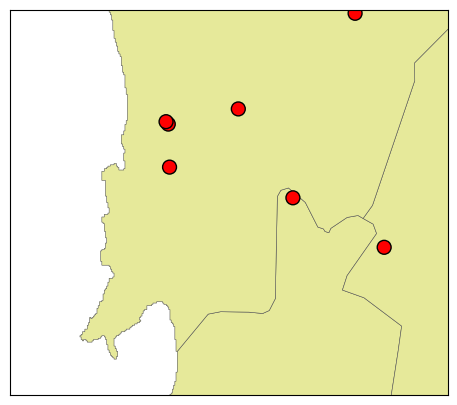

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(72.8,72.9)
ax.set_ylim(19.03,19.112)
geodf_city.plot(ax = ax, color='#e6e99a', linewidth=.4,edgecolor='#545454')
ax.scatter(mumbai['lon'] - 0.01,mumbai['lat'] + 0.025, color = mumbai['color'], s = 100, edgecolors='black')
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.savefig('Location_Mumbai_plot.png', dpi=400, bbox_inches="tight")


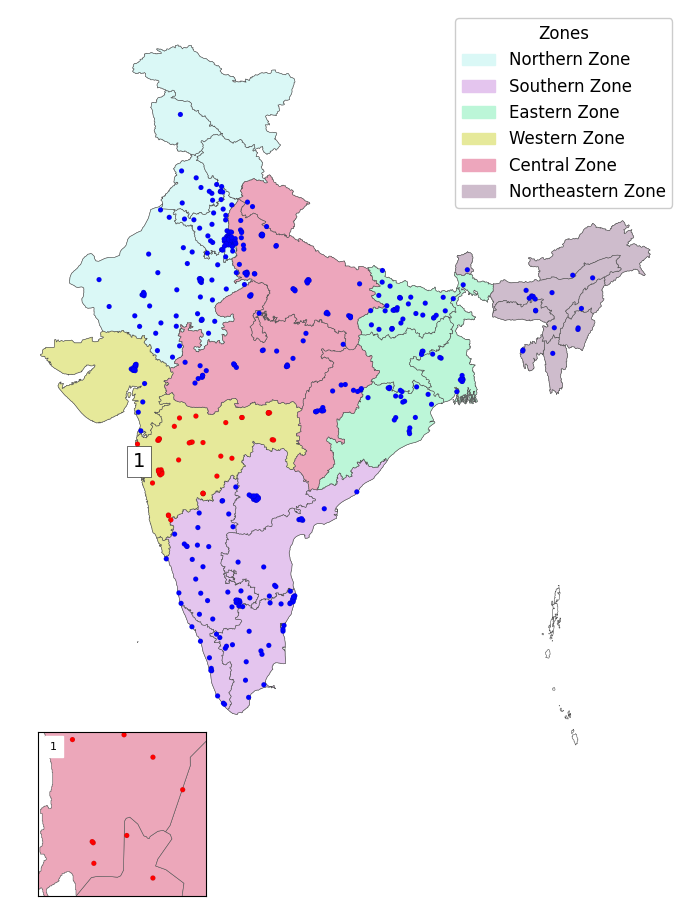

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1,1,figsize=(10,10))
geodf = gpd.read_file("files/shapefiles/india_state_original.geojson")

geodf.plot(ax = ax, color='white', linewidth=.4,edgecolor='#545454')
northern_zone = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana','Delhi', 'Rajasthan','Ladakh']
southern_zone = ['Karnataka', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Telangana']
eastern_zone = ['West Bengal', 'Bihar', 'Jharkhand', 'Odisha']
western_zone = ['Maharashtra', 'Gujarat', 'Goa']
central_zone = ['Madhya Pradesh', 'Chhattisgarh','Uttar Pradesh','Uttarakhand']
northeastern_zone = ['Assam', 'Sikkim', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh', 'Meghalaya']
# zones = [northern_zone, southern_zone, eastern_zone, western_zone, central_zone, northeastern_zone]
zones = {
    'Northern Zone': northern_zone,
    'Southern Zone': southern_zone,
    'Eastern Zone': eastern_zone,
    'Western Zone': western_zone,
    'Central Zone': central_zone,
    'Northeastern Zone': northeastern_zone
}
colors = {
    'Northern Zone': '#daf8f6',
    'Southern Zone': '#e4c5ee',
    'Eastern Zone': '#bcf6d8',
    'Western Zone': '#e6e99a',
    'Central Zone': '#eda6bc',
    'Northeastern Zone': '#cebccc'
}

geodf_city = gpd.read_file(r"files/shapefiles/india_taluk.geojson")
df = sites_master.rename(columns = {'latitude':'lat', 'longitude':'lon'})
df['color'] = np.where(df['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
mumbai = df[(df['lat'] > 19.03) & (df['lat'] < 19.112) & (df['lon'] > 72.82) & (df['lon'] < 72.9)]
# kolkata = df[(df['lat'] > 22.48) & (df['lat'] < 22.662) & (df['lon'] > 88.25) & (df['lon'] < 88.45)]
# delhi = df[(df['lat'] > 28.34) & (df['lat'] < 28.88) & (df['lon'] > 76.08) & (df['lon'] < 77.4)]

#Mumbai
cbaxes = inset_axes(ax, width="25%", height="25%", loc='lower left',
                    bbox_to_anchor=(-0.01-0.04+0.08,-0.18,1,1), bbox_transform=ax.transAxes)
cbaxes.set_ylim([19.029+0.01, 19.102+0.01])       #mum
cbaxes.set_xlim([72.82, 72.9])          #mum 
geodf_city.plot(ax = cbaxes, color='#eca7ba', linewidth=.4,edgecolor='#545454')
cbaxes.scatter(mumbai['lon'],mumbai['lat'], color = mumbai['color'], s = 13, edgecolors='black', linewidth=0.05)
cbaxes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.text(.07, .94, '1', ha='left', va='top', transform=cbaxes.transAxes, size= 8, backgroundcolor = 'white')

# #Kolkata
# cbaxes = inset_axes(ax, width="25%", height="25%", loc='lower center',bbox_to_anchor=(-0.01-0.04,-0.18,1,1), bbox_transform=ax.transAxes)
# cbaxes.set_xlim(88.25,88.45)
# cbaxes.set_ylim(22.48,22.662)
# geodf_city.plot(ax = cbaxes, color='#b6fad7', linewidth=.4,edgecolor='#545454')
# cbaxes.scatter(kolkata['lon'],kolkata['lat'], color = kolkata['color'], s = 13, edgecolors='black', linewidth=0.05)
# cbaxes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
# plt.text(.07, .94, '2', ha='left', va='top', transform=cbaxes.transAxes, size= 8, backgroundcolor = 'white')

# #Delhi
# cbaxes = inset_axes(ax, width="25%", height="25%", loc='lower right',
#                     bbox_to_anchor=(-0.01-0.05-0.07,-0.18,1,1), bbox_transform=ax.transAxes)
# geodf_city.plot(ax = cbaxes, color='#eca7ba', linewidth=.4,edgecolor='#545454')
# cbaxes.set_ylim([27.49+0.85,28.88])
# cbaxes.set_xlim([76+0.8, 77.4])
# cbaxes.scatter(delhi['lon'],delhi['lat'], color = delhi['color'], s = 13, edgecolors='black', linewidth=0.05)
# cbaxes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
# plt.text(.07, .94, '3', ha='left', va='top', transform=cbaxes.transAxes, size= 8, backgroundcolor = 'white')
# for axis in ['top','bottom','left','right']:
#     cbaxes.spines[axis].set_linewidth(0.4)


for zone in zones.keys():
    geodf[geodf['ST_NM'].isin(zones[zone])].plot(ax = ax, color=colors[zone], linewidth=.4,edgecolor='#545454', label=zone)
ax.legend(title = "Zones", loc='upper right',facecolor="white",framealpha=1, handles=[
    mpatches.Patch(color=colors[zone], label=zone) for zone in zones.keys()
])
ax.set_axis_off()
site_master['color'] = np.where(site_master['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
site_master = site_master.sort_values(by = 'color')
ax.scatter(site_master['longitude'],site_master['latitude'], color = site_master['color'], s = 13, edgecolors='black', linewidth=0.05)

ax.annotate('1', xy=(72.82, 19.029+0.01),ha="center", va="center", color='black', fontsize=14,bbox=dict(boxstyle='square', facecolor='white', edgecolor='black',lw=0.4))
# ax.annotate('2', xy=(88.25, 22.48),ha="center", va="center", color='black', fontsize=14,bbox=dict(boxstyle='square', facecolor='white', edgecolor='black',lw=.4))
# ax.annotate('3', xy=(76+0.8, 27.49+0.85),ha="center", va="center", color='black', fontsize=14,bbox=dict(boxstyle='square', facecolor='white', edgecolor='black',lw=0.4))

plt.savefig('plots/figure_s1.png', dpi=1200, bbox_inches="tight")
plt.show()

### Figure S2

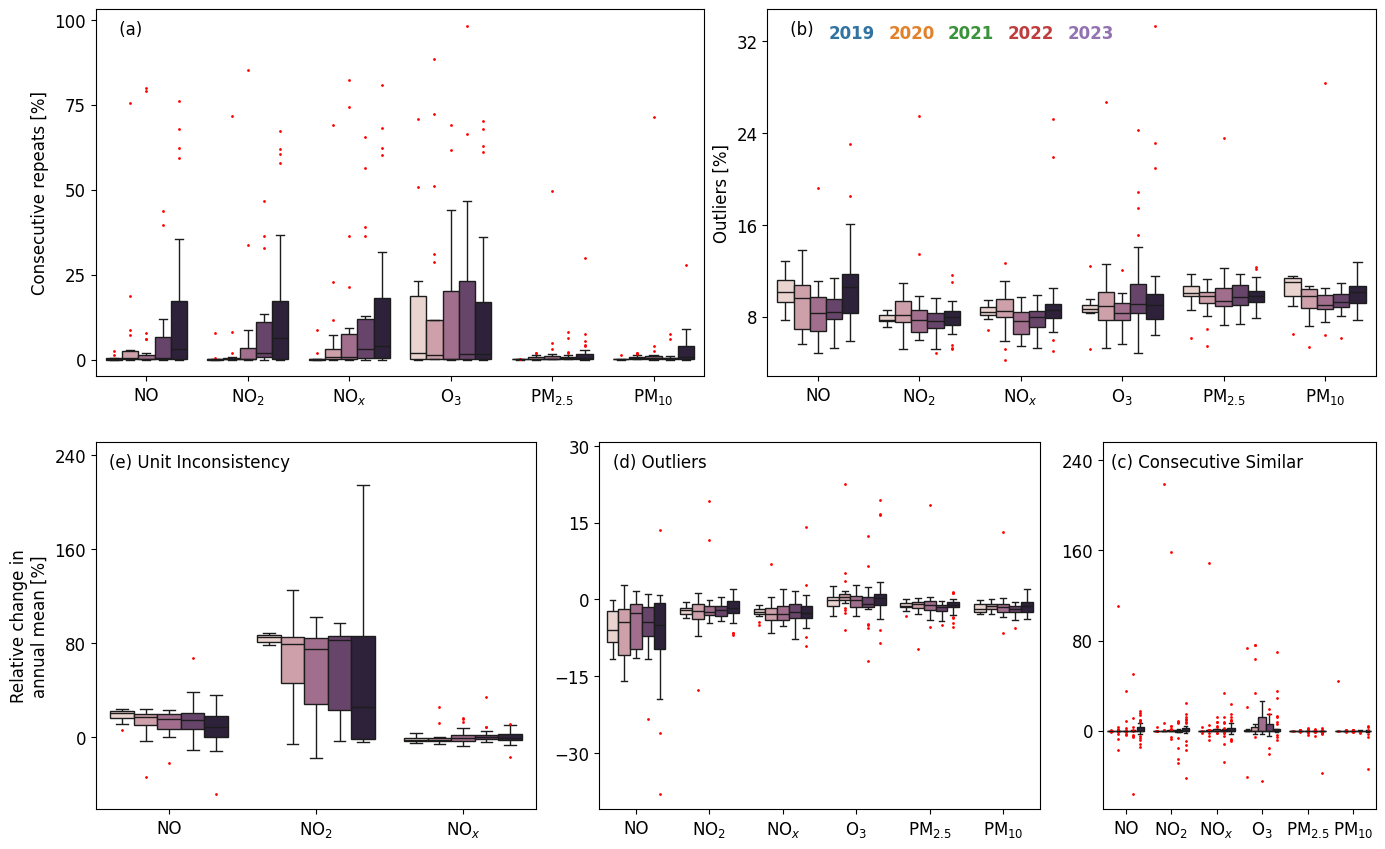

In [ ]:
fig = plt.figure(figsize=(16,10))

gs = fig.add_gridspec(2,8)

ax1 = fig.add_subplot(gs[0:1, 0:4])
ax2 = fig.add_subplot(gs[0:1, 4:8])
ax3 = fig.add_subplot(gs[1:2, 0:3])
ax4 = fig.add_subplot(gs[1:2, 3:6])
ax5 = fig.add_subplot(gs[1:2, 6:8])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.2)

df = summary_mean

count_var = pd.read_csv(r"Summary\summary_count_final.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
#     t = t[(t[name+'_clean'] != 0)]
    t.replace(0, np.nan, inplace=True)
    t[name + '_consecutive repeats'] = (t[name] - t[name+'_consecutives'])*100/t[name]
    t[name + '_outliers'] = (t[name+'_consecutives']-t[name+'_outliers'])*100/t[name+'_consecutives']
    if name[:2] == 'NO':
        t[name + '_unit inconsistency'] =  (df[name + '_CPCB']-df[name + '_outliers'])*100/df[name + '_outliers']
per_df = t


melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutive repeats', 'NO2_consecutive repeats', 
                                                            'NOx_consecutive repeats', 'Ozone_consecutive repeats','PM25_consecutive repeats',
                                                            'PM10_consecutive repeats'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops)


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])

ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_ylabel("Consecutive repeats [%]")
ax1.set_xlabel("Pollutants")
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax1.set_ylim([-2, 50])

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

# print(melt_df_1)
# exit()


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax2, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )
# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])
ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_ylabel("Outliers [%]")
ax2.set_xlabel("Pollutants")
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax2.set_ylim([4, 12])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)

# ax1.set_ylim([0, 45])
#
from matplotlib.patches import Rectangle
# rectangle = plt.Rectangle((0,0), 50, 20, fc='blue',ec="red",axis = inset_ax1)

# ax1.set_ylim([-2,60])

ax1.get_legend().remove()
ax2.get_legend().remove()
# ax1.set_ylim([-2, 50])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=2.2,
                    hspace=0.3)


# fig.savefig('Figure_S_consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")
#############


count_var = pd.read_csv(r"Summary\summary_mean_final.csv")
t = count_var
df = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']
for name in lst:
    t[name + '_consecutive repeats'] = (t[name+'_consecutives'] - t[name])*100/t[name]
    t[name + '_outliers'] = (t[name+'_outliers'] - t[name+'_consecutives'])*100/t[name+'_consecutives']
    if name[:2] == 'NO':
        per_df[name + '_Unit inconsistency'] =  (df[name + '_CPCB']-df[name + '_outliers'])*100/df[name + '_outliers']
per_df = t

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutive repeats', 'NO2_consecutive repeats', 
                                                            'NOx_consecutive repeats', 'Ozone_consecutive repeats','PM25_consecutive repeats',
                                                            'PM10_consecutive repeats'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax5, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax5.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax5.set_ylabel("Relative change in " + "\n"+"annual mean [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax3.set_ylim([-2, 50])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)




melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax4, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops)


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax4.set_ylim([2, 25])



from matplotlib.patches import Rectangle

ax5.get_legend().remove()
ax4.get_legend().remove()

# ax3.set_ylim([-5,30])
# ax4.set_ylim([-15,35])



#================================


#========================
per_df = pd.read_csv(r"Summary\summary_mean_final.csv")
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] =  (per_df[name + '_CPCB']-per_df[name + '_outliers'])*100/per_df[name + '_outliers']
melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_Unit inconsistency', 'NO2_Unit inconsistency', 
                                                            'NOx_Unit inconsistency'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])

sns.boxplot(ax = ax3, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )




ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$'])
ax3.set_ylabel("Outliers [%]")
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax5.set_ylim([-20, 250])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)


ax3.get_legend().remove()


ax3.set_ylabel("Relative change in annual mean [%]")
ax4.set_ylabel("")
ax5.set_ylabel("")

# ax3.set_ylim([-8, 18])

# ax4.set_ylim([-12, 10])

# ax5.set_ylim([-20, 120])


custom_lines = [Line2D([0], [0], color='#3274a1', lw=0),
                Line2D([0], [0], color='#e1812c', lw=0),
                Line2D([0], [0], color='#3a923a', lw=0),
                Line2D([0], [0], color='#c03d3e', lw=0),
                Line2D([0], [0], color='#9372b2', lw=0)]


legend_properties = {'weight':'bold'}
legend = ax2.legend(custom_lines, 
                    ['2019', '2020', '2021', '2022','2023'], 
                    labelcolor='linecolor',
                    loc='best',
                    fontsize=10,
                    prop=legend_properties, 
                    ncols=5,
                    columnspacing=-2)

frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')
# label = Label(frame, text='Hello', font=(18, 'bold'))

# fig.savefig('Figure_S_mean consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")
# fig.savefig('Figure_S_mean consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.18)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
# fig.suptitle('(B) With outliers ', fontsize=14)

# ax1.set_ylim([-2, 110])
# ax2.set_ylim([-2, 60])
# ax3.set_ylim([-85, 100])
# ax4.set_ylim([-60, 70])
ax3.set_ylim([ax3.get_ylim()[0], ax3.get_ylim()[1] * 1.1])
ax4.set_ylim([ax4.get_ylim()[0], ax4.get_ylim()[1] * 1.2])
ax5.set_ylim([ax5.get_ylim()[0], ax5.get_ylim()[1] * 1.1])

plt.text(.03, .97, ' (a)', ha='left', va='top', transform=ax1.transAxes, backgroundcolor = 'white')
plt.text(.03, .97, ' (b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'white')
plt.text(.03, .97, '(c) Consecutive Similar', ha='left', va='top', transform=ax5.transAxes,  backgroundcolor = 'none')
plt.text(.03, .97, '(d) Outliers', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none')
plt.text(.03, .97, '(e) Unit Inconsistency', ha='left', va='top',transform=ax3.transAxes, backgroundcolor = 'none')

ax3.set_ylabel("Relative change in" + "\n"+"annual mean [%]")

# fig.savefig('Figure_S_mean consecutive_and_outliers_2019_2021_outliers.png', dpi=400, bbox_inches="tight")
fig.savefig(f'Plots/figure_s2_outliers.png')

plt.show()

### Fig S4 Data Availability

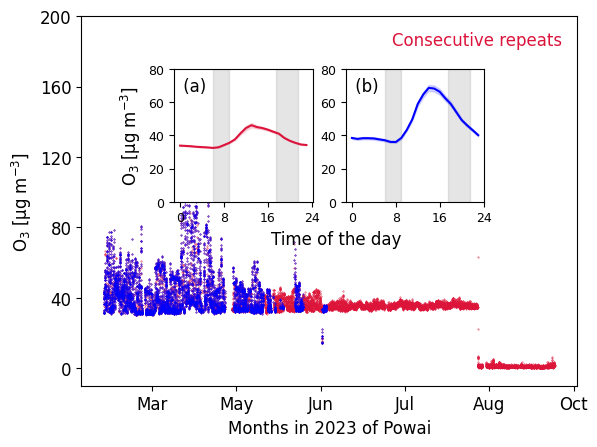

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
from scripts.plot_diurnal import get_diurnal
inset_label = 12

fig, ax = plt.subplots()
import pandas as pd
path = (r"data\After_Cleaning_Mumbai\site_5112_2023.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')


local_df = local_df[(local_df['Timestamp'].dt.month <10) & (local_df['Timestamp'].dt.month >= 3)]

ax.scatter(local_df['Timestamp'],local_df['Ozone'], color = '#FF7722',edgecolors='crimson', s =0.1)
ax.scatter(local_df['Timestamp'],local_df['Ozone_outliers'], color = 'blue', s=0.1)
# # Set xaxis formatter to month abbr with the %b format string
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# plt.ylabel("NO" + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')
plt.ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
plt.xlabel("Months in 2020")
plt.ylim(top=200)
plt.ylim(bottom=-10)


pol ='Ozone'


ax.set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
ax.set_xlabel("Months")
inset_ax = inset_axes(ax,
                      height="45%", # set height
                      width="35%",loc='upper right',
                   bbox_to_anchor=(0.03,0.08,0.8,0.8), bbox_transform=ax.transAxes)
# path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_198_More_Chowk_Waluj_Aurangabad_MPCB_2019.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')

df = local_df[(local_df['Timestamp'].dt.month <4) & (local_df['Timestamp'].dt.month >= 0)]
# get_diurnal(df, pol, '#FF7722', 'title', inset_ax)
get_diurnal(df, pol+'_outliers', 'b', 'title', inset_ax)


# path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_198_More_Chowk_Waluj_Aurangabad_MPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')

inset_ax1 = inset_axes(ax,
                      height="45%", # set height
                      width="35%",loc='upper left',
                   bbox_to_anchor=(0.17,0.08,0.8,0.8), bbox_transform=ax.transAxes)


df = local_df[(local_df['Timestamp'].dt.month <6) & (local_df['Timestamp'].dt.month > 4)]
get_diurnal(df, pol, 'crimson', 'title', inset_ax1)

inset_ax.axvspan(6, 9, alpha=0.2, color='grey')
inset_ax.axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')
inset_ax1.axvspan(6, 9, alpha=0.2, color='grey')
inset_ax1.axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')
inset_ax1.set_ylim([0,80])
inset_ax.set_ylim([0,80])
# inset_ax = 


legend = ax.legend([Line2D([0], [0], color='crimson', lw=0)], 
             ['    Consecutive repeats'],facecolor = 'white',labelcolor='linecolor', 
             loc='upper right',framealpha =0, fancybox = False)


ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

inset_ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
inset_ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

inset_ax.yaxis.set_major_locator(plt.MaxNLocator(4))
inset_ax.xaxis.set_major_locator(plt.MaxNLocator(4))

inset_ax.tick_params(labelsize=9)
inset_ax1.tick_params(labelsize=9)


inset_ax1.set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']',size = inset_label)
inset_ax.set_xlabel("Time of the day                              ", size = inset_label)
plt.text(.03, .94, ' (a)', ha='left', va='top', transform=inset_ax1.transAxes, backgroundcolor = 'none')
plt.text(.03, .94, ' (b)', ha='left', va='top',transform = inset_ax.transAxes, backgroundcolor = 'none')

ax.set_xlabel("Months in 2023 of Powai")

fig.savefig('plots/Figure_s4.png', dpi=1200, bbox_inches="tight")
# plt.show()

### Fig S3 Heatmap

In [ ]:
original_net = pd.read_csv(r'files/monthly_condensed_new.csv')
print(original_net.shape)
original_net = pd.merge(original_net, summary_mean[['site_id','year','pollutant']], on = ['site_id','year'], how = 'left')
print(original_net.shape)

(1655, 41)
(1655, 42)


In [ ]:
original_net

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,month,site_id,site_name,pollutant
0,2976.0,2891.0,2889.0,2660.0,2621.0,2656.0,0.0,2873.0,2875.0,2868.0,2889.0,2709.0,2709.0,2888.0,2636.0,2636.0,2652.0,2416.0,2416.0,2598.0,2347.0,2347.0,2657.0,2310.0,2310.0,2856.0,2639.0,2639.0,1995.0,1995.0,1995.0,2416.0,1995.0,1995.0,1995.0,1995.0,2976.0,2019,1,site_168,Bandra_Mumbai_MPCB,"PM25,PM10,NO2,Ozone"
1,2688.0,2640.0,2503.0,2194.0,2194.0,2194.0,0.0,2587.0,2636.0,2636.0,2640.0,2469.0,2469.0,2503.0,2325.0,2325.0,2194.0,1942.0,1942.0,2161.0,1950.0,1950.0,2194.0,1921.0,1921.0,2636.0,2450.0,2450.0,1756.0,1756.0,1756.0,1942.0,1756.0,1756.0,1756.0,1756.0,2688.0,2019,2,site_168,Bandra_Mumbai_MPCB,"PM25,PM10,NO2,Ozone"
2,2976.0,2873.0,2754.0,2877.0,2877.0,2877.0,0.0,2819.0,2715.0,2873.0,2873.0,2687.0,2687.0,2754.0,2552.0,2552.0,2877.0,2542.0,2542.0,2877.0,2562.0,2562.0,2877.0,2535.0,2535.0,2873.0,2691.0,2691.0,2301.0,2301.0,2301.0,2542.0,2301.0,2301.0,2301.0,2301.0,2976.0,2019,3,site_168,Bandra_Mumbai_MPCB,"PM25,PM10,NO2,Ozone"
3,2880.0,2666.0,2533.0,2700.0,2700.0,2697.0,0.0,2531.0,2698.0,2696.0,2666.0,2508.0,2508.0,2533.0,2389.0,2389.0,2697.0,2427.0,2427.0,2700.0,2447.0,2447.0,2700.0,2344.0,2344.0,2696.0,2382.0,2382.0,2198.0,2198.0,2198.0,2427.0,2198.0,2198.0,2198.0,2198.0,2880.0,2019,4,site_168,Bandra_Mumbai_MPCB,"PM25,PM10,NO2,Ozone"
4,2976.0,2793.0,2711.0,2829.0,2831.0,2829.0,0.0,2693.0,2837.0,2833.0,2793.0,2642.0,2642.0,2711.0,2520.0,2520.0,2547.0,2312.0,2312.0,2831.0,2674.0,2674.0,2579.0,2249.0,2249.0,2330.0,2085.0,2085.0,2061.0,2061.0,2061.0,2312.0,2061.0,2061.0,2061.0,2061.0,2976.0,2019,5,site_168,Bandra_Mumbai_MPCB,"PM25,PM10,NO2,Ozone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,2976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2976.0,2023,8,site_5964,Ghatkopar_Mumbai_BMC,"PM25,PM10,NO2,Ozone"
1651,2880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2880.0,2023,9,site_5964,Ghatkopar_Mumbai_BMC,"PM25,PM10,NO2,Ozone"
1652,2976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2976.0,2023,10,site_5964,Ghatkopar_Mumbai_BMC,"PM25,PM10,NO2,Ozone"
1653,2880.0,1582.0,1582.0,1579.0,1585.0,1585.0,1585.0,1585.0,1585.0,908.0,1542.0,1325.0,1325.0,1422.0,1207.0,1207.0,1582.0,1451.0,1451.0,960.0,871.0,871.0,1577.0,1435.0,1435.0,908.0,816.0,816.0,795.0,795.0,795.0,1451.0,795.0,795.0,795.0,795.0,2880.0,2023,11,site_5964,Ghatkopar_Mumbai_BMC,"PM25,PM10,NO2,Ozone"


### heatmap 2-rows

AttributeError: 'GrouperView' object has no attribute 'join'

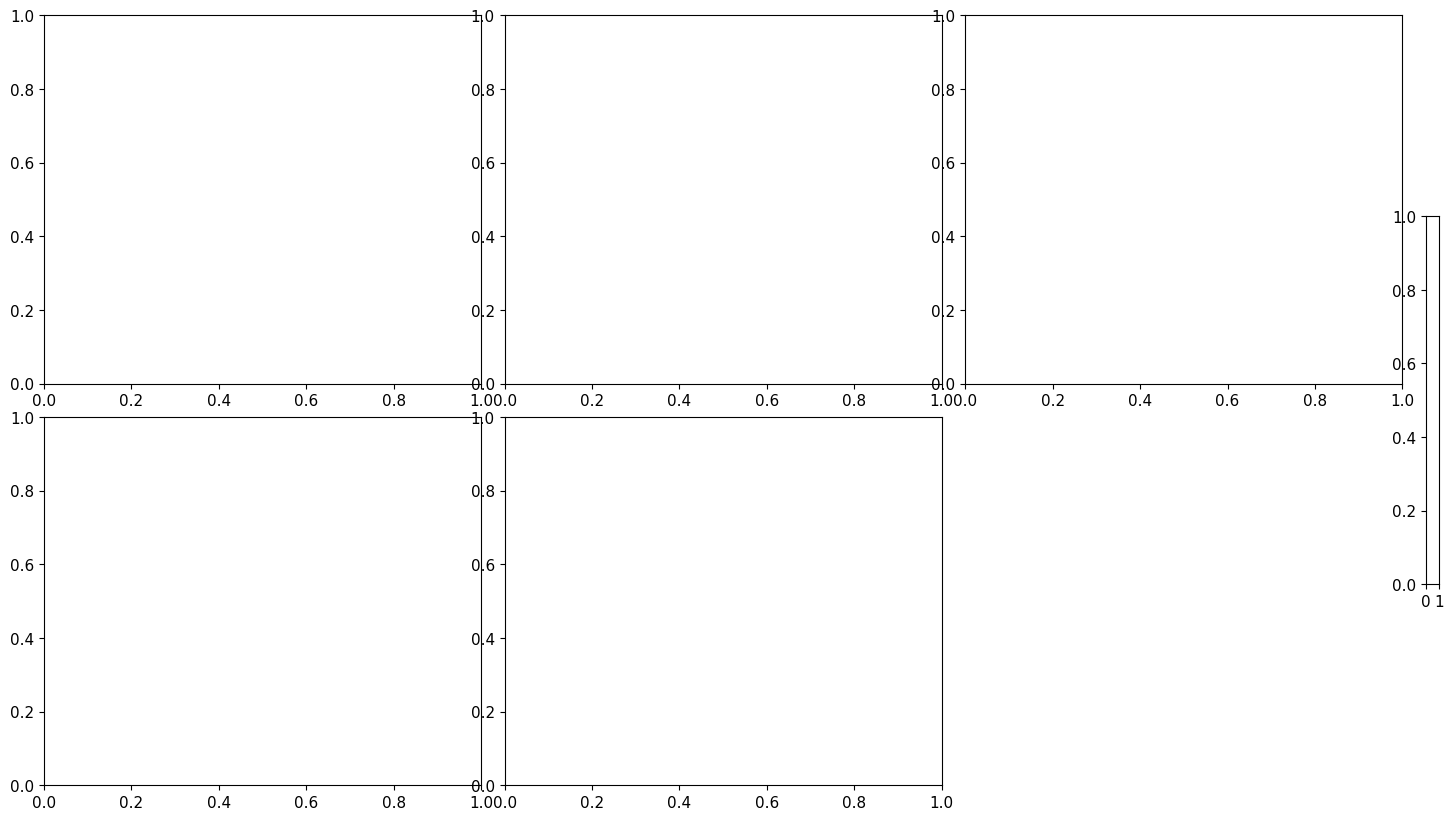

In [ ]:
# import seaborn  as sns
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import matplotlib
# import pandas as pd

# def plot_outlier_heatmap(monthly_condensed_summary: str, savefile: str):
#     pols = ['NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'PM25']
#     original_net = pd.read_csv(monthly_condensed_summary)
#     original_net = pd.merge(original_net, summary_mean[['site_id','year','pollutant']], on = ['site_id','year'], how = 'left')
#     melts = pd.DataFrame(columns=['year','month','pol','repeats'])
#     for pol in pols:
#         net = deepcopy(original_net.loc[original_net['pollutant'].str.contains('NO2' if pol in ['NOx','NO'] else pol)])
#         net[pol] = (net[pol + '_consecutives'] - net[pol + '_outliers'])/net[pol + '_consecutives'] * 100
#         # temp = net.groupby(['year','month'])
#         temp = net.melt(id_vars=['year','month'], value_vars=[pol], var_name='pol', value_name='repeats')
#         # print(temp.columns)
#         melts = pd.concat([melts,temp], axis=0)
#     # print(melts[melts['repeats'] > 70])
#     net = melts
    
#     matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
#     matplotlib.rcParams['legend.handlelength'] = 1
#     matplotlib.rcParams['legend.handleheight'] = 1
#     params = {'mathtext.default': 'regular' }         
#     sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
#     plt.rcParams.update(params)

#     # f,(ax1,ax2,ax3,ax4,ax5,axcb) = plt.subplots(1,6, figsize=(25,3),gridspec_kw={'width_ratios':[1,1,1,1,1,0.08]})
#     f = plt.figure(figsize=(18,10))
#     gs = f.add_gridspec(4,10)
#     gs.set_width_ratios([1,1,1,1,1,1,1,1,1,0.1])
#     ax1 = f.add_subplot(gs[0:2,0:3])
#     ax2 = f.add_subplot(gs[0:2,3:6])
#     ax3 = f.add_subplot(gs[0:2,6:9])
#     ax4 = f.add_subplot(gs[2:4,0:3])
#     ax5 = f.add_subplot(gs[2:4,3:6])
#     axcb = f.add_subplot(gs[1:3,9:10])
#     ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5)
#     plt.subplots_adjust(hspace=0.7, bottom=0.1)
    
#     vmin = 999999999
#     vmax = -999999999
#     for i in [2019,2020,2021,2022,2023]:
#         net1 = net[(net['year'] == i)]
#         heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#         vmin = min(np.floor(heatmap_data.min().min()),vmin)
#         vmax = max(np.ceil(heatmap_data.max().max()),vmax)
#     print(vmin,vmax)
    
#     net1 = net[(net['year'] == 2019)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g1 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax1,annot=True,fmt='.1f',annot_kws={"fontsize":7.7}, vmin=vmin, vmax=vmax)
#     # g1.set_ylabel('Pollutant')
#     g1.set_ylabel('')
#     g1.set_xlabel('')

#     net1 = net[(net['year'] == 2020)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g2 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax2,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
#     g2.set_ylabel('')
#     g2.set_xlabel('')
#     g2.set_yticks([])


#     net1 = net[(net['year'] == 2021)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g3 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax3,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
#     g3.set_ylabel('')
#     g3.set_xlabel('')
#     g3.set_yticks([])

#     net1 = net[(net['year'] == 2022)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g4 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax4,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
#     # g4.set_ylabel('Pollutant')
#     g4.set_ylabel('')
#     g4.set_xlabel('')
#     # g4.set_yticks([])

#     net1 = net[(net['year'] == 2023)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g5 = sns.heatmap(heatmap_data,cmap="jet",ax=ax5, cbar_ax=axcb,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},cbar_kws={'label': 'Outliers [%]','ticks':np.round(np.linspace(vmin,vmax,8,endpoint=True))},vmin=vmin, vmax=vmax)
#     axcb.set_ylim(vmin, vmax)
#     g5.set_xlabel('')
#     g5.set_ylabel('')
#     g5.set_yticks([])


#     # may be needed to rotate the ticklabels correctly:
#     for ax in [g1,g2,g3,g4,g5]:
#         tl = ax.get_xticklabels()
#         ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
#         tly = ax.get_yticklabels()
#         ax.set_yticklabels(tly, rotation=0)

        
#     ax1.set_title("2019")
#     ax2.set_title("2020")
#     ax3.set_title('2021')
#     ax4.set_title('2022')
#     ax5.set_title('2023')
#     # g2.set_xlabel('Months')
#     matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
#     matplotlib.rcParams['legend.handlelength'] = 1
#     matplotlib.rcParams['legend.handleheight'] = 1
#     params = {'mathtext.default': 'regular' }         
#     sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
#     plt.rcParams.update(params)


#     g1.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
#     g4.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
#     plt.text(.005, 1.09, ' (f)', ha='left', va='top', transform=ax1.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (g)', ha='left', va='top', transform=ax2.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (h)', ha='left', va='top', transform=ax3.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (i)', ha='left', va='top', transform=ax4.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (j)', ha='left', va='top', transform=ax5.transAxes, size= 11, backgroundcolor = 'none')

#     plt.show()
#     f.savefig(savefile, dpi=400, bbox_inches="tight")


# def plot_consecutives_heatmap(monthly_condensed_summary: str, savefile: str):
#     pols = ['NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'PM25']
#     original_net = pd.read_csv(monthly_condensed_summary)
#     original_net = pd.merge(original_net, summary_mean[['site_id','year','pollutant']], on = ['site_id','year'], how = 'left')
#     melts = pd.DataFrame(columns=['year','month','pol','repeats'])
#     for pol in pols:
#         net = deepcopy(original_net.loc[original_net['pollutant'].str.contains('NO2' if pol in ['NOx','NO'] else pol)])
#         net[pol] = (net[pol] - net[pol + '_consecutives'])/net[pol] * 100
#         # temp = net.groupby(['year','month'])
#         temp = net.melt(id_vars=['year','month'], value_vars=[pol], var_name='pol', value_name='repeats')
#         # print(temp.columns)
#         melts = pd.concat([melts,temp], axis=0)
#     # print(melts)
#     net = melts

#     matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
#     matplotlib.rcParams['legend.handlelength'] = 1
#     matplotlib.rcParams['legend.handleheight'] = 1
#     params = {'mathtext.default': 'regular' }         
#     sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
#     plt.rcParams.update(params)

#     # f,(ax1,ax2,ax3,ax4,ax5,axcb) = plt.subplots(1,6, figsize=(25,3),gridspec_kw={'width_ratios':[1,1,1,1,1,0.08]})
#     f = plt.figure(figsize=(18,10))
#     gs = f.add_gridspec(4,10)
#     gs.set_width_ratios([1,1,1,1,1,1,1,1,1,0.1])
#     ax1 = f.add_subplot(gs[0:2,0:3])
#     ax2 = f.add_subplot(gs[0:2,3:6])
#     ax3 = f.add_subplot(gs[0:2,6:9])
#     ax4 = f.add_subplot(gs[2:4,0:3])
#     ax5 = f.add_subplot(gs[2:4,3:6])
#     axcb = f.add_subplot(gs[1:3,9:10])
#     ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5)
#     plt.subplots_adjust(hspace=0.7, bottom=0.1)
#     vmin = 999999999
#     vmax = -999999999
#     for i in [2019,2020,2021,2022,2023]:
#         net1 = net[(net['year'] == i)]
#         heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#         vmin = min(np.floor(heatmap_data.min().min()),vmin)
#         vmax = max(np.ceil(heatmap_data.max().max()),vmax)
#     print(vmin,vmax)
#     net1 = net[(net['year'] == 2019)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g1 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax1,annot=True,fmt='.1f',annot_kws={"fontsize":7.7},vmin=vmin, vmax=vmax)
#     # g1.set_ylabel('Pollutant')
#     g1.set_ylabel('')
#     g1.set_xlabel('')

#     net1 = net[(net['year'] == 2020)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g2 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax2,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
#     g2.set_ylabel('')
#     g2.set_xlabel('')
#     g2.set_yticks([])


#     net1 = net[(net['year'] == 2021)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g3 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax3,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
#     g3.set_ylabel('')
#     g3.set_xlabel('')
#     g3.set_yticks([])

#     net1 = net[(net['year'] == 2022)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g4 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax4,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
#     # g4.set_ylabel('Pollutant')
#     g4.set_ylabel('')
#     g4.set_xlabel('')

#     net1 = net[(net['year'] == 2023)]
#     heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
#     g5 = sns.heatmap(heatmap_data,cmap="jet",ax=ax5, cbar_ax=axcb,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},cbar_kws={'label': 'Consecutive Similar [%]', 'ticks':np.round(np.linspace(vmin,vmax,6,endpoint=True))}, vmin=vmin, vmax=vmax)
#     axcb.set_ylim(axcb.set_ylim(vmin, vmax))
#     g5.set_xlabel('')
#     g5.set_ylabel('')
#     g5.set_yticks([])


#     # may be needed to rotate the ticklabels correctly:
#     for ax in [g1,g2,g3,g4,g5]:
#         tl = ax.get_xticklabels()
#         ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
#         tly = ax.get_yticklabels()
#         ax.set_yticklabels(tly, rotation=0)

        
#     ax1.set_title("2019")
#     ax2.set_title("2020")
#     ax3.set_title('2021')
#     ax4.set_title('2022')
#     ax5.set_title('2023')
#     # g2.set_xlabel('Months')
#     matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
#     matplotlib.rcParams['legend.handlelength'] = 1
#     matplotlib.rcParams['legend.handleheight'] = 1
#     params = {'mathtext.default': 'regular' }         
#     sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
#     plt.rcParams.update(params)


#     g1.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
#     g4.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
#     plt.text(.005, 1.09, ' (a)', ha='left', va='top', transform=ax1.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (b)', ha='left', va='top', transform=ax2.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (c)', ha='left', va='top', transform=ax3.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (d)', ha='left', va='top', transform=ax4.transAxes, size= 11, backgroundcolor = 'none')
#     plt.text(.005, 1.09, ' (e)', ha='left', va='top', transform=ax5.transAxes, size= 11, backgroundcolor = 'none')

#     plt.show()
#     f.savefig(savefile, dpi=400, bbox_inches="tight")
# if __name__ == '__main__':
#     plot_outlier_heatmap(r'files/monthly_condensed_new.csv','plots/figure_monthly_s3_1.png')
#     plot_consecutives_heatmap(r'files/monthly_condensed_new.csv','plots/figure_monthly_s3_2.png')

### Fig S5 Comparision of NO NO2 and NOX

site_168_2019
site_168_2020
site_168_2021
site_168_2022
skipping-  site_168_2022
site_168_2023
skipping-  site_168_2023
site_261_2019
skipping-  site_261_2019
site_261_2020
skipping-  site_261_2020
site_261_2021
skipping-  site_261_2021
site_261_2022
skipping-  site_261_2022
site_261_2023
skipping-  site_261_2023
site_5102_2019
site_5102_2020
site_5102_2021
site_5102_2022
site_5102_2023
site_5103_2019
site_5103_2020
site_5103_2021
site_5103_2022
site_5103_2023
site_5104_2019
site_5104_2020
site_5104_2021
site_5104_2022
site_5104_2023
site_5106_2019
site_5106_2020
site_5106_2021
site_5106_2022
site_5106_2023
site_5107_2019
site_5107_2020
site_5107_2021
site_5107_2022
site_5107_2023
site_5112_2019
site_5112_2020
site_5112_2021
site_5112_2022
site_5112_2023
site_5113_2019
site_5113_2020
site_5113_2021
site_5113_2022
site_5113_2023
site_5114_2019
site_5114_2020
site_5114_2021
site_5114_2022
site_5114_2023
site_5115_2019
site_5115_2020
site_5115_2021
site_5115_2022
site_5115_2023
site_5119_

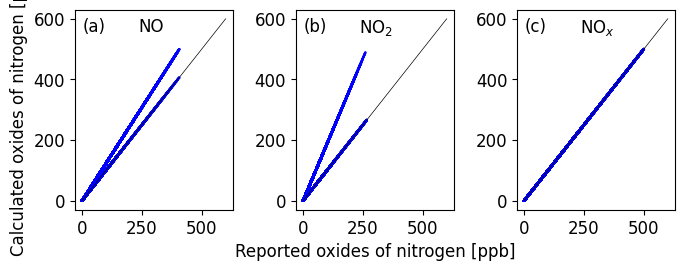

In [ ]:
directory = r'data/After_Cleaning_Mumbai/'
NOx = []
NO2 = []
NO = []
NOx_CPCB = []
NO2_CPCB = []
NO_CPCB= []
score = []
for filename in os.listdir(directory):
    path = os.path.join(directory, filename)
    station_name = filename.replace(".csv", "")
    print(station_name)
    local_df = pd.read_csv(path)
    try:
        local_df = local_df[['NO2', 'NO', 'NOx', 'NO_CPCB', 'NO2_CPCB', 'NOx_CPCB', 'error']].dropna()
        # NOx.append(local_df['NOx (ppm)'].mean())
        score.extend(local_df['error'].tolist())
        NOx.extend(local_df['NOx'].tolist())
        NO2.extend(local_df['NO2'].tolist())
        NO.extend(local_df['NO'].tolist())
        NOx_CPCB.extend(local_df['NOx_CPCB'].tolist())
        NO2_CPCB.extend(local_df['NO2_CPCB'].tolist())
        NO_CPCB.extend(local_df['NO_CPCB'].tolist())
    except Exception as e:
        print("skipping- ", station_name)
        continue

df = pd.DataFrame()
df['NO'] = NO
df['NO2'] = NO2
df['NOx'] = NOx
df['NO_std'] = NO_CPCB
df['NO2_std'] = NO2_CPCB
df['NOx_std'] = NOx_CPCB
df['score'] = score
df['score'] = df['score'].apply(lambda x: 'red' if x == 'red' else 'blue')
df.dropna().to_csv("artifacts/pollutants.csv")
# df = df[df['score'] != 'yellow']
all_df = df
df = all_df
# fig, ax = plt.subplots(1,3, sharey=False, sharex=True,figsize=(7,3),gridspec_kw={'width_ratios': [2.5, 2.5, 2.5]})
fig, ax = plt.subplots(1,3, sharey=False,figsize=(7.5,2.5),gridspec_kw={'width_ratios': [3,3,3]})

ax[0].scatter(df['NO']/1.23,df['NO_std']/1.23, color = df['score'], s =3,marker = '.')

ax[1].scatter(df['NO2']/1.88,df['NO2_std']/1.88, s =3,marker = '.', color = df['score'])
ax[2].scatter(df['NOx'],df['NOx_std'], color = df['score'], s =3,marker = '.')
ax[1].set_xlabel("Reported oxides of nitrogen " +'[ppb]')
ax[0].set_ylabel("Calculated oxides of nitrogen " +'[ppb]')


df = df[df['score'] != 'blue']
ax[2].scatter(df['NOx'],df['NOx_std'], color = df['score'], s =3,marker = '.')

for axis in ax:
    axis.plot([0,600], [0,600], color = 'black', linewidth=0.5)

#     axis.legend(loc='upper right',facecolor="white",framealpha=1)
#     lgnd = axis.legend(loc="upper right", scatterpoints=1, fontsize=8)
#     lgnd.legendHandles[0]._sizes = [50]
#     lgnd.get_frame().set_alpha(1)
#     lgnd.get_frame().set_edgecolor('white')
    
plt.text(.05, .96, '(a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(c)', ha='left', va='top', transform=ax[2].transAxes,backgroundcolor = 'white')


plt.text(0.4 ,.96, "NO", ha='left', va='top',transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(0.4 ,.96, "NO" + '$_{2}$', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')
plt.text(0.4 ,.96, "NO" + '$_{x}$', ha='left', va='top', transform=ax[2].transAxes,backgroundcolor = 'white')

# ax[0].set_xlim([1,50])
# ax[0].set_ylim([1,50])
# ax[1].set_xlim([1,50])
# ax[1].set_ylim([1,50])
# ax[2].set_xlim([1,50])
# ax[2].set_ylim([1,50])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.savefig('plots/Figure_NOx_units.png', dpi=1200,bbox_inches="tight")

plt.show()

### Fig S5: Identification of extreme outliers

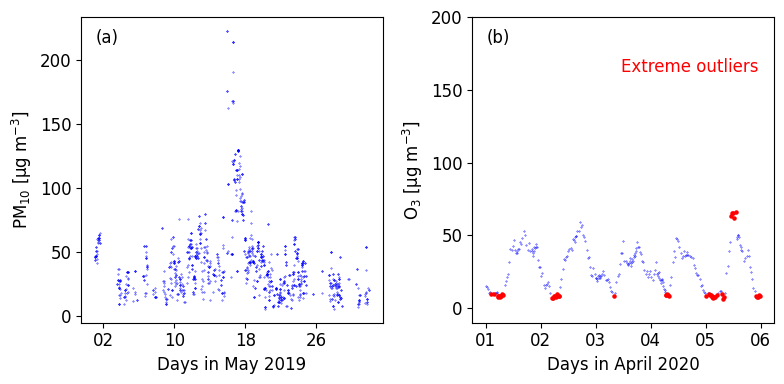

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 11

# font = {'family' : 'sans-serif', 'serif' : 'Arial', 'size' : BIGGER_SIZE} 
# plt.rc('font', **font)
# # plt.rc('font', size=BIGGER_SIZE)      # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, ax = plt.subplots(1,2, sharey=False,figsize=(8,4))

path = (r"data\After_Cleaning_Mumbai\site_5112_2020.csv")

local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')
local_df = local_df[(local_df['Timestamp'].dt.month == 5)]
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0].scatter(local_df['Timestamp'],(local_df['PM10']) , color = 'b', s = 0.1)
df_1 = local_df[(local_df['PM10'] > 300)]

ax[0].scatter(df_1['Timestamp'],df_1['PM10'], color = 'r', s= 5)

ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax[0].set_ylabel("PM" + '$_{10}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[0].set_xlabel("Days in May 2019")


ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))


path = (r"data\After_Cleaning_Mumbai\site_5112_2020.csv")

local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')

local_df = local_df[(local_df['Timestamp'].dt.month == 4)&(local_df['Timestamp'].dt.day <= 5)]

ax[1].scatter(local_df['Timestamp'],(local_df['Ozone']) , color = 'b', s = 0.1)

df_1 = local_df[(local_df['Ozone'] > 60)]

ax[1].scatter(df_1['Timestamp'],df_1['Ozone'], color = 'r', s= 5)

df_1 = local_df[(local_df['Ozone'] < 10)]

ax[1].scatter(df_1['Timestamp'],df_1['Ozone'], color = 'r', s= 5)


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax[1].set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[1].set_xlabel("Days in April 2020")
ax[1].set_ylim([-10,200])
# ax[0].set_ylim([0,300])
fig.tight_layout()



legend = ax[1].legend([Line2D([0], [0], color='#0000fd', lw=0),
              Line2D([0], [0], color='#ff0000', lw=0)], 
             ['  ', 
              'Extreme outliers'],facecolor = 'white',labelcolor='linecolor',
             loc='upper right',framealpha =0, fancybox = False)



ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(6))

ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))
plt.text(.05, .96, '(a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')


fig.savefig('Plots/Figure_s_outliers.png', dpi=600, bbox_inches="tight")


### Figure S9: Impact of cleaning

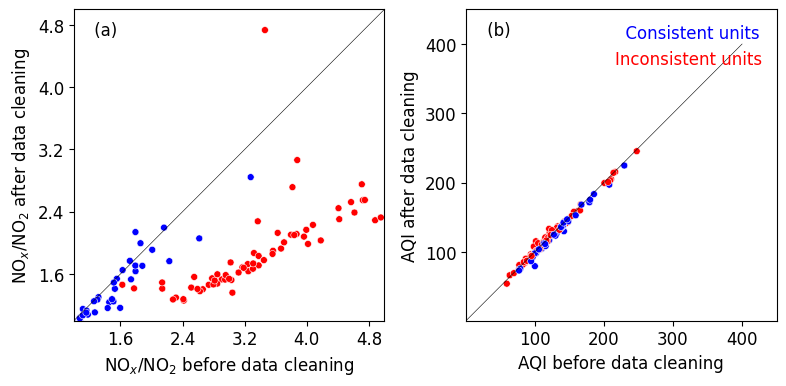

In [ ]:
df = pd.read_csv(r'Summary\summary_mean_final.csv')

df['Before_NOx_NO2_ratio'] = df['NOx']/(df['NO2']/1.88)
df['After_NOx_NO2_ratio'] = df['NOx_CPCB']/(df['NO2_CPCB']/1.88)
# df['df['unit_inconsistency'] == 'yes'']
df['relative'] = (df['After_NOx_NO2_ratio'] - df['Before_NOx_NO2_ratio'])*100/df['Before_NOx_NO2_ratio']
# df[df['unit_inconsistency'] == 'no']['relative'].mean(),df[df['unit_inconsistency'] == 'yes']['relative'].std()
fig, ax = plt.subplots(1,2, sharey=False,sharex=False,figsize=(8,4))

ax[0].plot([1,7], [1,7], c = 'black', lw=0.4)
df['unit_inconsistency'] = df['prevalent_error'].apply(lambda x: 'red' if x == 'C1' else 'blue')
g =sns.scatterplot(ax = ax[0], x="Before_NOx_NO2_ratio", y="After_NOx_NO2_ratio",
              hue="unit_inconsistency",
              data=df, s = 25, palette = ['red', 'blue']);

ax[0].set_xlim([1,5])
ax[0].set_ylim([1,5])



ax[0].set_xlabel("NO" + '$_{x}$' + '/NO'+ '$_{2}$' + ' before data cleaning')
ax[0].set_ylabel("NO" + '$_{x}$' + '/NO'+ '$_{2}$' + ' after data cleaning')
ax[0].get_legend().remove()

ax[1].plot([1,400], [1,400], c = 'black', lw=0.4)
g = sns.scatterplot(ax = ax[1], x="AQI_before_cleaning", y="AQI_after_cleaning",hue="unit_inconsistency",data=df, s = 25, palette = ['red', 'blue'])

ax[1].set_xlim([1,450])
ax[1].set_ylim([1,450])



ax[1].set_xlabel('AQI before data cleaning')
ax[1].set_ylabel('AQI after data cleaning')
ax[1].get_legend().remove()


legend = ax[1].legend([Line2D([0], [0], color='#0000fd', lw=0),
              Line2D([0], [0], color='#ff0000', lw=0)], 
             ['  Consistent units', 
              'Inconsistent units'],facecolor = 'white',labelcolor='linecolor',
             loc='upper right',framealpha =0, fancybox = False)


ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout(pad=1)
plt.text(.05, .96, ' (a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')

fig.savefig('plots/Figure_s9.png', dpi=1200, bbox_inches="tight")



### Fig S10 erronous waves

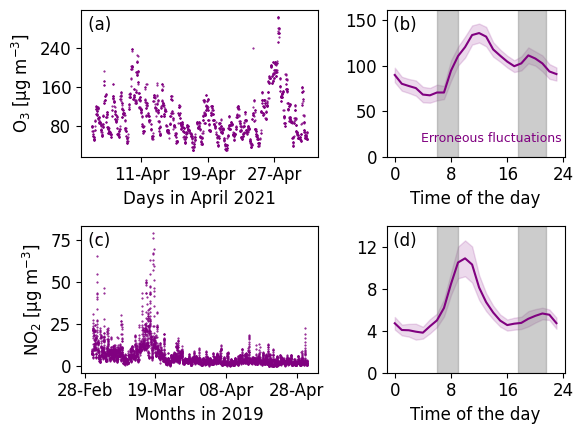

In [ ]:
from scripts.plot_diurnal import get_diurnal

path = (r"data\After_Cleaning_Mumbai\site_5112_2021.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')

local_df = local_df[(local_df['Timestamp'].dt.month == 4)&(local_df['Timestamp'].dt.day >4)&(local_df['Timestamp'].dt.day <31)]

fig, ax = plt.subplots(2,2, figsize=(6,4.5),gridspec_kw={'width_ratios': [4, 3]})

pol = 'PM10_clean'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0,0].scatter(local_df['Timestamp'],local_df[pol], color = 'purple', s =1,marker = '.')
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax[0,0].set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[0,0].set_xlabel("Days in April 2021")
# ax[0,0].set_ylim([0,60])
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))

get_diurnal(local_df, pol, 'purple', 'title', ax[0,1])
ax[0,1].set_xlabel("Time of the day")


path = (r"data\After_Cleaning_Mumbai\site_5112_2020.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], errors='coerce')

local_df = local_df[(local_df['Timestamp'].dt.month == 3) | (local_df['Timestamp'].dt.month == 4)]

pol = 'NO2'
ax[1,0].scatter(local_df['Timestamp'],local_df[pol], color = 'purple', s =1,marker = '.')
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax[1,0].set_ylabel("NO" + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[1,0].set_xlabel("Months in 2019")

get_diurnal(local_df, pol, 'purple', 'title', ax[1,1])
ax[1,1].set_xlabel("Time of the day")


ax[1,1].axvspan(6, 9, alpha=0.4, color='grey')
ax[1,1].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')
ax[0,1].axvspan(6, 9, alpha=0.4, color='grey')
ax[0,1].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')

fig.tight_layout()

plt.text(.01, .96, ' (a)', ha='left', va='top', transform=ax[0,0].transAxes)
plt.text(.01, .96, ' (b)', ha='left', va='top', transform=ax[0,1].transAxes)
plt.text(.01, .96, ' (c)', ha='left', va='top', transform=ax[1,0].transAxes)
plt.text(.01, .96, ' (d)', ha='left', va='top', transform=ax[1,1].transAxes)


ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(3))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(4))

# ax[1,0].set_ylim([0,25])
# ax[1,1].set_ylim([0,25])


legend = ax[0,1].legend([Line2D([0], [0], color='purple', lw=0)], 
             ['Erroneous fluctuations '],facecolor = 'white',labelcolor='linecolor', 
             loc='lower center',framealpha =1, fancybox = False, fontsize=9)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')

for axis in ax:
    for axes in axis:
        
        axes.xaxis.set_major_locator(plt.MaxNLocator(4))
        axes.yaxis.set_major_locator(plt.MaxNLocator(4))

fig.savefig('Figure_s10.png', dpi=600, bbox_inches="tight")
plt.show()

### Figure S11

(8832, 44)
(8832, 44)


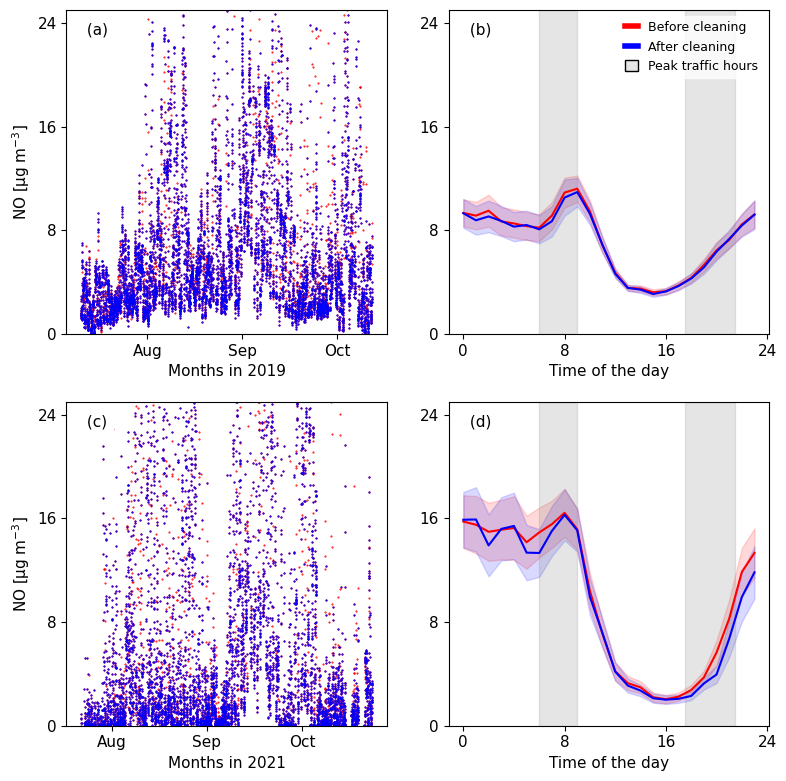

In [ ]:
from matplotlib.patches import Patch
import matplotlib
path = (r"data\After_Cleaning_Mumbai\site_5112_2019.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

local_df = local_df[(local_df['Timestamp'].dt.month >= 8)&(local_df['Timestamp'].dt.month <11)]
print(local_df.shape)
fig, ax = plt.subplots(2,2, sharey=False,figsize=(8,8),gridspec_kw={'width_ratios': [3, 3]})
# plt.figure(figsize=(3,6))

pol = 'NO'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0,0].scatter(local_df['Timestamp'],local_df[pol], color = 'red', s =1,marker = '.')
ax[0,0].scatter(local_df['Timestamp'],local_df[pol + '_outliers'], color = 'blue', s =1,marker = '.')
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0,0].set_ylabel("NO" + ' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[0,0].set_xlabel("Months in 2019", fontsize=11)
ax[0,0].set_ylim([0,60])
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))


get_diurnal(local_df, pol, 'red', 'title', ax[0,1])
get_diurnal(local_df, pol + '_outliers', 'blue', 'title', ax[0,1])
# get_diurnal(df, pol+'_clean_outliers', 'b', 'title', ax[1])

# ax[0,1].get_legend().remove() 

ax[0,1].set_xlabel("Time of the day", fontsize=11)


path = (r"data\After_Cleaning_Mumbai\site_5112_2021.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
local_df = local_df[(local_df['Timestamp'].dt.month >= 8)&(local_df['Timestamp'].dt.month <11)]
print(local_df.shape)

pol = 'NO'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[1,0].scatter(local_df['Timestamp'],local_df[pol], color = 'red', s =1,marker = '.')
ax[1,0].scatter(local_df['Timestamp'],local_df[pol + '_outliers'], color = 'blue', s =1,marker = '.')
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,0].set_ylabel("NO" +' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[1,0].set_xlabel("Months in 2021", fontsize=11)
ax[1,0].set_ylim([15,70])



get_diurnal(local_df, pol, 'red', 'title', ax[1,1])
get_diurnal(local_df, pol + '_outliers', 'blue', 'title', ax[1,1])
# get_diurnal(df, pol+'_outliers', 'b', 'title', ax[1])

# ax[1,1].get_legend().remove() 

ax[1,1].set_xlabel("Time of the day", fontsize=11)


ax[1,1].axvspan(6, 9, alpha=0.2, color='grey')

ax[1,1].axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')


ax[0,1].axvspan(6, 9, alpha=0.2, color='grey')

ax[0,1].axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')

# ax[0,0].annotate(' [a]',(.1, .96),ha='left', va='top',size= 10) 
fig.tight_layout()

plt.text(.05, .96, ' (a)', ha='left', va='top',size= 11, transform=ax[0,0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (b)', ha='left', va='top',size= 11, transform=ax[0,1].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (c)', ha='left', va='top',size= 11, transform=ax[1,0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (d)', ha='left', va='top',size= 11, transform=ax[1,1].transAxes,backgroundcolor = 'white')


ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(3))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(4))


ax[0,0].set_ylim([0,25])
ax[0,1].set_ylim([0,25])
ax[1,0].set_ylim([0,25])
ax[1,1].set_ylim([0,25])


custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),
                Line2D([0], [0], color='#0000fd', lw=4),
                Patch(facecolor='#e5e5e5', edgecolor='black',label='Color Patch')]



legend = ax[0,1].legend(custom_lines, ['Before cleaning', 'After cleaning', 'Peak traffic hours'], loc='upper right', fontsize=9)

frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

matplotlib.rcParams.update({'font.size': 11, 'font.family':'sans-serif', 'font.serif':'Arial'})

sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})

ax[0,0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(4))


matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1
params = {'mathtext.default': 'regular' }         
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
plt.rcParams.update(params)

fig.savefig('plots/Figure_s11.png', dpi=1200, bbox_inches="tight")
plt.show()

### Figure S12

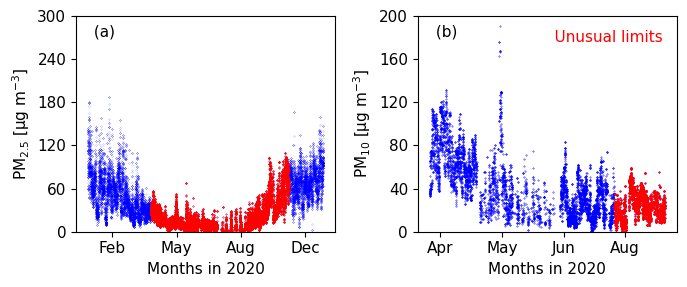

In [ ]:
fig, ax = plt.subplots(1,2, sharey=False,figsize=(7,3),gridspec_kw={'width_ratios': [3,3]})

path = (r"data\After_Cleaning_Mumbai\site_5112_2020.csv")

local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

ax[0].scatter(local_df['Timestamp'],local_df['PM25'], color = 'blue', s =0.01)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0].set_ylabel("PM" + '$_{2.5}$'+ ' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[0].set_xlabel("Months in 2020", fontsize=11)


ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))

t = local_df.loc[local_df["Timestamp"].between("2020-04-08", "2020-11-08")]
ax[0].scatter(t['Timestamp'],t['PM25'], color = 'red', s =0.1)


path = (r"data\After_Cleaning_Mumbai\site_5112_2020.csv")
local_df =  pd.read_csv(path)
local_df['Timestamp']=pd.to_datetime(local_df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

local_df = local_df[(local_df['Timestamp'].dt.month > 3)&(local_df['Timestamp'].dt.month <9)]

ax[1].scatter(local_df['Timestamp'],local_df['PM10'], color = 'blue', s =0.1)


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1].set_ylabel("PM" + '$_{10}$'+ ' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[1].set_xlabel("Months in 2020", fontsize=11)
ax[1].set_ylim([-0,200])
ax[0].set_ylim([0,300])
fig.tight_layout()

legend = ax[1].legend([Line2D([0], [0], color='red', lw=0)], 
             ['    Unusual limits'],facecolor = 'white',labelcolor='linecolor', fontsize =11,
             loc='upper right',framealpha =1, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')



t = local_df.loc[local_df["Timestamp"].between("2020-07-30", "2020-09-01")]
ax[1].scatter(t['Timestamp'],t['PM10'], color = 'red', s =0.3)
plt.text(.05, .96, ' (a)', ha='left', va='top',size= 11, transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (b)', ha='left', va='top',size= 11, transform=ax[1].transAxes,backgroundcolor = 'white')

fig.savefig('Figure_s12.png', dpi=1200, bbox_inches="tight")


### Figure S14

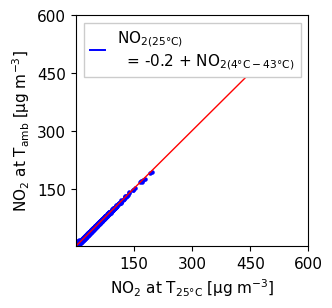

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, sharey=False,sharex=False,figsize=(3,3),gridspec_kw={'width_ratios': [2.5]})
fig_no = 10
axis_no = 8
label_no = 10
df = pd.read_csv(r"data\After_Cleaning_Mumbai\site_5112_2021.csv")
df1 = pd.read_csv(r"data/CPCB/Mumbai/15Min_2021_site_5112_Powai_Mumbai_MPCB_15Min.csv")

df['Timestamp']=pd.to_datetime(df['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df1['Timestamp']=pd.to_datetime(df1['Timestamp'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

df = pd.merge(df, df1[['Timestamp', 'AT (°C)']], on = 'Timestamp', how = 'left')
df = df.rename(columns = {'AT (°C)':'Temp'})
df['NOx'] =  pd.to_numeric(df.NOx, errors='coerce')
df['NO'] =  pd.to_numeric(df.NO, errors='coerce')
df['NO2'] =  pd.to_numeric(df.NO2, errors='coerce')
df['Temp'] =  pd.to_numeric(df['Temp'], errors='coerce')
df['NO2_outliers'] = pd.to_numeric(df.NO2_outliers, errors='coerce')
df['NO_outliers'] = pd.to_numeric(df.NO_outliers, errors='coerce')
df['NOx_outliers'] =pd.to_numeric(df.NOx_outliers, errors='coerce') 
df=df.dropna(how='all')
df['NO2_const'] = 1/(22.414*(df['Temp']+273)/(273*46.0055))
df['NO_const'] = 1/(22.414*(df['Temp']+273)/(273*30.0061))
# df['NO2_const'] = 1.88
# df['NO_const'] = 1.23
# local_df = df.copy(deep =True)


df=df.dropna(how='all')
df['NO2_const'] = 1/(22.414*(df['Temp']+273)/(273*46.0055))
df['NO_const'] = 1/(22.414*(df['Temp']+273)/(273*30.0061))
df['NO_std_temp'] = df['NO_clean']
df['NO2_std_temp'] = df['NO2_clean']
df['NOx_std_temp'] = df['NOx_clean']

df['score'] = df['error'].apply(lambda x: 'blue' if x == 'C1' else 'red')
df.loc[df['score'] == 'red', 'NO_std_temp'] = df['NO_clean']*df['NO_const']
df.loc[df['score'] == 'red', 'NO2_std_temp'] = df['NO2_clean']*df['NO2_const']
df.loc[df['score'] == 'red', 'NOx_std_temp'] = df['NO2_clean'] + df['NO_clean']

df.loc[df['score'] == 'violet', 'NO_std_temp'] = df['NO_clean']*df['NO_const']
df.loc[df['score'] == 'violet', 'NO2_std_temp'] = df['NO2_clean']
df.loc[df['score'] == 'violet', 'NOx_std_temp'] = (df['NO2_clean']/df['NO2_const']) + (df['NO_clean'])


df.loc[df['score'] == 'blue', 'NO_std_temp'] = df['NO_clean']
df.loc[df['score'] == 'blue', 'NO2_std_temp'] = df['NO2_clean']
df.loc[df['score'] == 'blue', 'NOx_std_temp'] = (df['NOx_clean'])
df=df.dropna(how='all')
df.to_csv("local_df_last.csv")
# sns.lmplot( x="NO2_std", y="NO2_std_temp", data=df, fit_reg=False)  
varx = df['NO2_CPCB']
vary = df['NO2_std_temp']
mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = stats.linregress(varx[mask], vary[mask])

# g =sns.scatterplot(ax = ax, x="NO2_std", y="NO2_std_temp", df = df, c='blue')
ax.plot([1,500], [1,500], c='red', lw=1)
ax.scatter(df['NO2_CPCB'], df['NO2_std_temp'], c='blue', s =5)


ax.set_xlim([1,600])
ax.set_ylim([1,600])
ax.set_ylabel("NO" + '$_{2}$'+ ' at'+ " T" + '$_{amb} $' +' [µg $\mathregular{ m^{-3}}$]')
ax.set_xlabel("NO" + '$_{2}$'+ ' at'+ " T" + '$_{25 °C} $' +' [µg $\mathregular{ m^{-3}}$]')


legend = ax.legend([Line2D([0], [0], color='blue', lw=1.4)], 
             [("NO" + '$_{2  (25 °C)}$' + "\n""  = -0.2 + NO" + '$_{2  (4°C -43°C)}$')],facecolor = 'white',
                   labelcolor='black',
             loc='upper left',framealpha =1, fancybox = False)
# frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
fig.savefig('Figure_s14.png', dpi=1200,bbox_inches="tight")


### Figure S16

In [ ]:
sites_master['organization'] = sites_master['name'].apply(lambda x: x.split('- ')[-1].strip())
sites_master[sites_master['stateID']=='Maharashtra']['organization'].value_counts()


organization
MPCB    71
IITM    17
BMC      5
Name: count, dtype: int64

In [ ]:
per_df['organization'] = per_df['site_name'].apply(lambda x: x.split('_')[-1].strip())
per_df

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,AQI_before_cleaning,AQI_after_cleaning,errors,prevalent_error,org,NO_Unit inconsistency,NO2_Unit inconsistency,NOx_Unit inconsistency,organization
0,17519.5,30.966476,96.687774,35.005538,25.789987,60.610293,NaN,15.734958,2.260990,27.533963,30.963299,30.261509,30.261509,96.683707,94.303187,94.303187,62.424148,61.155526,61.155526,26.645606,26.348312,26.348312,35.239965,34.304005,34.304005,27.753478,28.456618,28.456618,42.358944,49.644965,60.842948,62.155526,-18.780163,0.028676,-12.337895,-6.413592,85,2019,site_168,Bandra_Mumbai_MPCB,94.716996,96.833133,"C1,C2,C4,C6",C2,Non-CPCB,2.004065,-2.164891,-0.899571,MPCB
1,17567.5,22.796492,59.785901,6.438245,9.603594,15.540890,NaN,19.592096,1.557501,16.168018,22.793001,22.380280,22.380280,59.502736,57.846013,57.846013,38.629190,38.785827,38.785827,30.621042,30.997174,30.997174,13.553719,13.001951,13.001951,28.466332,34.888971,34.888971,15.860508,67.257772,48.663638,39.785827,-19.133907,0.029671,-16.719761,-2.384475,959,2020,site_168,Bandra_Mumbai_MPCB,64.122772,66.540485,"C1,C2,C4,C6",C2,Non-CPCB,-101.948689,-222.766387,-149.572747,MPCB
2,17519.5,35.657979,94.886973,45.489024,10.334039,54.045184,NaN,28.848964,0.754519,42.427046,34.205844,40.523089,40.523089,93.699581,106.134674,106.134674,60.717272,61.918694,61.918694,26.700217,29.820122,29.820122,61.720861,62.725692,62.725692,53.696560,53.697305,53.697305,73.019645,24.402854,71.838710,62.918694,-13.939388,4.602674,-2.575987,-6.760727,163,2021,site_168,Bandra_Mumbai_MPCB,102.000925,115.629460,"C1,C2,C4,C6,UNIDENTIFIABLE",C2,Non-CPCB,-37.891927,-188.562105,-14.568383,MPCB
3,17519.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022,site_168,Bandra_Mumbai_MPCB,NaN,NaN,NaN,NaN,Non-CPCB,NaN,NaN,NaN,MPCB
4,17519.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2023,site_168,Bandra_Mumbai_MPCB,NaN,NaN,NaN,NaN,Non-CPCB,NaN,NaN,NaN,MPCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,17519.5,67.218806,122.306128,7.016401,37.792148,25.343749,25.731929,8.118783,0.760168,48.422263,67.287875,67.296964,67.296964,121.781408,123.823910,123.823910,25.347455,24.642153,24.642153,37.791298,37.188397,37.188397,7.018924,6.164952,6.164952,48.424134,49.883173,49.883173,6.270852,35.960195,23.915404,25.642153,0.262540,18.256513,1.424082,17.094972,137,2023,site_5960,Byculla_Mumbai_BMC,141.882071,142.407279,"C1,C4",C1,Non-CPCB,12.135129,1.597556,2.768322,BMC
134,15525.0,96.652087,215.278157,5.780626,64.708191,38.437565,19.029287,14.059791,0.828571,66.655461,97.593920,97.441576,97.441576,216.834738,215.018982,215.018982,38.532255,36.343184,36.343184,64.909685,64.288133,64.288133,5.786969,3.588063,3.588063,65.661043,65.909672,65.909672,3.595386,61.693133,35.110172,37.343184,0.628403,30.178348,1.300711,29.506040,0,2023,site_5961,Shivaji_Nagar_Mumbai_BMC,229.786975,224.787711,C1,C1,Non-CPCB,37.929505,0.649157,5.448789,BMC
135,17519.5,72.196177,201.030674,4.008917,35.839448,22.137521,17.547627,7.762567,0.799272,29.760679,72.179369,73.034683,73.034683,200.999617,196.127226,196.127226,22.189219,21.101135,21.101135,35.879826,34.968576,34.968576,4.037122,2.979255,2.979255,29.405655,30.068564,30.068564,2.726557,33.726380,19.805405,22.101135,0.343471,16.634118,0.853138,16.124451,69,2023,site_5962,Kandivali_West_Mumbai_BMC,167.825617,168.387557,"C1,C2,C4",C1,Non-CP

In [ ]:

melt_df_1 = per_df.melt(id_vars=['organization'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_').tolist(),
                                columns = ['Pollutant','Cleaning_method'])
sites_master[sites_master['stateID']=='Maharashtra']['organization'].value_counts()

organization
MPCB    71
IITM    17
BMC      5
Name: count, dtype: int64

In [ ]:
count_var

,timestamp,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,PM25_consecutives,PM25_outliers,PM25_clean,PM10_consecutives,PM10_outliers,PM10_clean,NOx_consecutives,NOx_outliers,NOx_clean,NO2_consecutives,NO2_outliers,NO2_clean,NO_consecutives,NO_outliers,NO_clean,Ozone_consecutives,Ozone_outliers,Ozone_clean,NO_CPCB,NO2_CPCB,NOx_CPCB,Threshold,C1,C2,C4,C6,mismatch,year,site_id,site_name,prevalent_error,errors
0,35040.0,29671.0,27524.0,32099.0,32048.0,32091.0,0.0,29776.0,32160.0,32291.0,29668.0,27847.0,27847.0,27523.0,25742.0,25742.0,29318.0,26569.0,26569.0,29552.0,27108.0,27108.0,31332.0,27813.0,27813.0,30761.0,26931.0,26931.0,23304.0,23304.0,23304.0,26569.0,23304.0,23304.0,23304.0,23304.0,85,2019,site_168,Bandra_Mumbai_MPCB,C2,"C1,C2,C4,C6"
1,35136.0,21206.0,12606.0,24817.0,25789.0,25743.0,0.0,23242.0,27623.0,25559.0,21203.0,20050.0,20050.0,12528.0,11858.0,11858.0,7965.0,7335.0,7335.0,7332.0,6808.0,6808.0,6080.0,5495.0,5495.0,7080.0,5191.0,5191.0,5129.0,5129.0,5129.0,7335.0,5129.0,5129.0,5129.0,5129.0,959,2020,site_168,Bandra_Mumbai_MPCB,C2,"C1,C2,C4,C6"
2,35040.0,24567.0,25976.0,20025.0,21092.0,20143.0,0.0,25085.0,23468.0,18806.0,12413.0,9489.0,9489.0,7397.0,5302.0,5302.0,3585.0,3353.0,3353.0,3134.0,2711.0,2711.0,4179.0,3893.0,3893.0,11406.0,10763.0,10763.0,1589.0,1589.0,1589.0,3353.0,1597.0,1597.0,1597.0,1597.0,163,2021,site_168,Bandra_Mumbai_MPCB,C2,"C1,C2,C4,C6,UNIDENTIFIABLE"
3,35040.0,12623.0,12266.0,12873.0,12871.0,12880.0,12270.0,12612.0,12321.0,10548.0,12617.0,11138.0,11138.0,12235.0,10824.0,10824.0,12879.0,11770.0,11770.0,12854.0,11812.0,11812.0,12872.0,11569.0,11569.0,3081.0,2920.0,2920.0,10617.0,10617.0,10617.0,11770.0,10617.0,10617.0,10617.0,10617.0,15,2019,site_5102,Vasai_West_Mumbai_MPCB,C2,"C1,C2,C4,C6"
4,35136.0,24355.0,18071.0,32575.0,29835.0,32576.0,28387.0,20478.0,29718.0,16499.0,24061.0,21618.0,21618.0,17741.0,15885.0,15885.0,32290.0,30911.0,30911.0,29792.0,27995.0,27995.0,32474.0,30305.0,30305.0,1899.0,1722.0,1722.0,25667.0,25667.0,25667.0,30911.0,25667.0,25667.0,25667.0,25667.0,2742,2020,site_5102,Vasai_West_Mumbai_MPCB,C2,"C2,C4,C6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,35040.0,4899.0,4899.0,4760.0,4897.0,4897.0,4858.0,4830.0,4630.0,4776.0,4824.0,4397.0,4397.0,4602.0,4015.0,4015.0,4892.0,4506.0,4506.0,4893.0,4499.0,4499.0,4758.0,4158.0,4158.0,4775.0,4324.0,4324.0,3849.0,3849.0,3849.0,4506.0,3849.0,3849.0,3849.0,3849.0,137,2023,site_5960,Byculla_Mumbai_BMC,C1,"C1,C4"
114,31051.0,575.0,575.0,575.0,575.0,575.0,575.0,574.0,574.0,564.0,551.0,495.0,495.0,553.0,491.0,491.0,572.0,534.0,534.0,571.0,525.0,525.0,574.0,506.0,506.0,556.0,518.0,518.0,466.0,466.0,466.0,534.0,466.0,466.0,466.0,466.0,0,2023,site_5961,Shivaji_Nagar_Mumbai_BMC,C1,C1
115,35040.0,3945.0,3722.0,3425.0,3460.0,3489.0,3017.0,3966.0,3968.0,3710.0,3726.0,3267.0,3267.0,3658.0,3237.0,3237.0,3470.0,3162.0,3162.0,3447.0,3195.0,3195.0,3398.0,2928.0,2928.0,3692.0,3377.0,3377.0,2766.0,2766.0,2766.0,3162.0,2766.0,2766.0,2766.0,2766.0,69,2023,site_5962,Kandivali_West_Mumbai_BMC,C1,"C1,C2,C4"
116,35040.0,3729.0,3737.0,3767.0,3838.0,3859.0,3797.0,3848.0,3850.0,3684.0,3725.0,3299.0,3299.0,3725.0,3290.0,3290.0,3854.0,3547.0,3547.0,3838.0,3573.0,3573.0,3767.0,3272.0,3272.0,3682.0,3279.0,3279.0,3032.0,3032.0,3032.0,3547.0,3032.0,3032.0,3032.0,3032.0,103,2023,site_5963,Sewri_Mumbai_BMC,C1,"C1,C4"


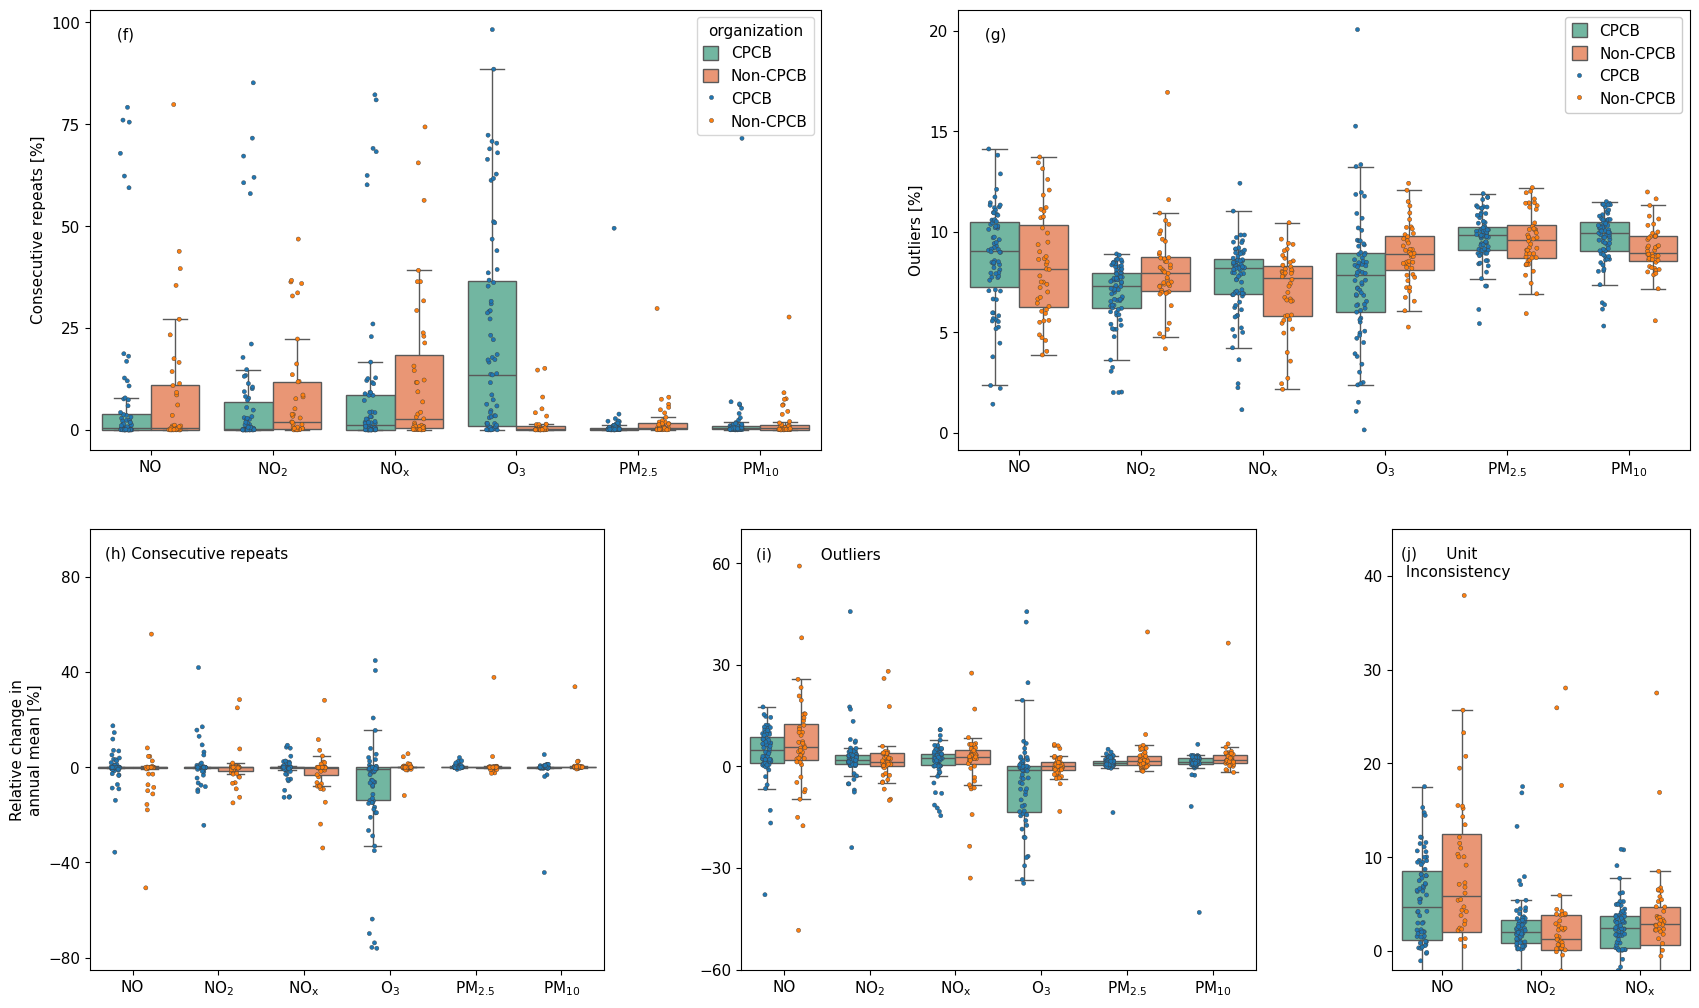

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Set up the figure and grid layout
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 8)

# Create subplots
ax1 = fig.add_subplot(gs[0:1, 0:4])
ax2 = fig.add_subplot(gs[0:1, 4:8])
ax3 = fig.add_subplot(gs[1:2, 0:3])
ax4 = fig.add_subplot(gs[1:2, 3:6])
ax5 = fig.add_subplot(gs[1:2, 6:8])

# Adjust subplot parameters
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1.7, hspace=0.2)

# Load data
sites_master = pd.read_csv(r"files/sites_master.csv")
count_var = pd.read_csv(r"Summary/summary_count_final.csv")

# Process count_var DataFrame
count_var['organization'] = count_var['site_name'].apply(lambda x: x.split('_')[-1].strip())
count_var = pd.merge(count_var, sites_master, on='site_id', how='left')
count_var['organization'] = np.where(count_var['organization'] == 'MPCB', 'CPCB', 'Non-CPCB')
t = count_var

# List of pollutants
pollutants = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']

# Calculate consecutive repeats and outliers
for name in pollutants:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy = t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy) / t[name]) * 100
    t[name + '_outliers'] = ((consecutives_copy - t[name + '_outliers']) / t[name]) * 100

per_df = t

# Melt DataFrame for consecutive repeats
melt_df_consecutives = per_df.melt(id_vars=['organization'], 
                                     value_vars=[name + '_consecutives' for name in pollutants])
melt_df_consecutives[['Pollutant', 'Cleaning_method']] = pd.DataFrame(
    melt_df_consecutives.variable.str.split('_').tolist(),
    columns=['Pollutant', 'Cleaning_method']
)

# Create strip plot for consecutive repeats
sns.boxplot(ax=ax1, x=melt_df_consecutives['Pollutant'], 
            y=melt_df_consecutives['value'], 
            hue=melt_df_consecutives['organization'], 
            hue_order=['CPCB', 'Non-CPCB'], 
            dodge=True, palette="Set2", fliersize=0, width=0.8)
sns.stripplot(ax=ax1, x=melt_df_consecutives['Pollutant'], 
              y=melt_df_consecutives['value'], 
              hue=melt_df_consecutives['organization'], 
              hue_order=['CPCB', 'Non-CPCB'], 
              dodge=True, s=3, linewidth=0.3)

# Set limits and labels for ax1
plt.ylim(-2, 45)
ax1.set_xticklabels(["NO", "NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$', "PM" + '$_{2.5}$', "PM" + '$_{10}$'])
ax1.set_ylabel("Consecutive repeats [%]")
ax1.set_xlabel("Pollutants")
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))

# Melt DataFrame for outliers
melt_df_outliers = per_df.melt(id_vars=['organization'], 
                                 value_vars=[name + '_outliers' for name in pollutants])
melt_df_outliers[['Pollutant', 'Cleaning_method']] = pd.DataFrame(
    melt_df_outliers.variable.str.split('_').tolist(),
    columns=['Pollutant', 'Cleaning_method']
)

# Create strip plot for outliers
sns.boxplot(ax=ax2, x=melt_df_outliers['Pollutant'], 
            y=melt_df_outliers['value'], 
            hue=melt_df_outliers['organization'], 
            hue_order=['CPCB', 'Non-CPCB'], 
            dodge=True, palette="Set2", fliersize=0, width=0.8)
sns.stripplot(ax=ax2, x=melt_df_outliers['Pollutant'], 
              y=melt_df_outliers['value'], 
              hue=melt_df_outliers['organization'], 
              hue_order=['CPCB', 'Non-CPCB'], 
              dodge=True, s=3, linewidth=0.3)

# Set limits ```python
plt.ylim(-2, 45)
ax2.legend(title="", loc='upper right', facecolor="white", framealpha=1)
ax2.set_xticklabels(["NO", "NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$', "PM" + '$_{2.5}$', "PM" + '$_{10}$'])
ax2.set_ylabel("Outliers [%]")
ax2.set_xlabel("Pollutants")
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))

# Adjust subplot parameters for the next set of plots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=2.2, hspace=0.3)

# Load mean data
count_var = pd.read_csv(r"Summary/summary_mean_final.csv")
count_var['organization'] = count_var['site_name'].apply(lambda x: x.split('_')[-1].strip())
count_var = pd.merge(count_var, sites_master, on='site_id', how='left')
count_var['organization'] = np.where(count_var['organization'] == 'MPCB', 'CPCB', 'Non-CPCB')
t = count_var

# Calculate consecutive repeats and outliers for mean data
for name in pollutants:
    consecutives_copy = t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = (t[name] - t[name + '_consecutives']) * 100 / t[name]
    t[name + '_outliers'] = (t[name] - t[name + '_outliers']) * 100 / t[name]

per_df = t

# Melt DataFrame for consecutive repeats
melt_df_consecutives_mean = per_df.melt(id_vars=['organization'], 
                                         value_vars=[name + '_consecutives' for name in pollutants])
melt_df_consecutives_mean[['Pollutant', 'Cleaning_method']] = pd.DataFrame(
    melt_df_consecutives_mean.variable.str.split('_').tolist(),
    columns=['Pollutant', 'Cleaning_method']
)

# Create strip plot for consecutive repeats (mean)
sns.boxplot(ax=ax3, x=melt_df_consecutives_mean['Pollutant'], 
            y=melt_df_consecutives_mean['value'], 
            hue=melt_df_consecutives_mean['organization'], 
            hue_order=['CPCB', 'Non-CPCB'], 
            dodge=True, palette="Set2", fliersize=0, width=0.8)
sns.stripplot(ax=ax3, x=melt_df_consecutives_mean['Pollutant'], 
              y=melt_df_consecutives_mean['value'], 
              hue=melt_df_consecutives_mean['organization'], 
              hue_order=['CPCB', 'Non-CPCB'], 
              dodge=True, s=3, linewidth=0.3)

# Set limits and labels for ax3
ax3.legend(title="", loc='upper right', facecolor="white", framealpha=1)
ax3.set_xticklabels(["NO", "NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$', "PM" + '$_{2.5}$', "PM" + '$_{10}$'])
ax3.set_ylabel("Relative change in " + "\n" + "annual mean [%]")
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))

# Melt DataFrame for outliers (mean)
melt_df_outliers_mean = per_df.melt(id_vars=['organization'], 
                                      value_vars=[name + '_outliers' for name in pollutants])
melt_df_outliers_mean[['Pollutant', 'Cleaning_method']] = pd.DataFrame(
    melt_df_outliers_mean.variable.str.split('_').tolist(),
    columns=['Pollutant', 'Cleaning_method']
)

# Create strip plot for outliers (mean)
sns.boxplot(ax=ax4, x=melt_df_outliers_mean['Pollutant'], 
            y=melt_df_outliers_mean['value'], 
            hue=melt_df_outliers_mean['organization'], 
            hue_order=['CPCB', 'Non-CPCB'], 
            dodge=True, palette="Set2", fliersize=0, width=0.8)
# Create strip plot for outliers (mean)
sns.stripplot(ax=ax4, x=melt_df_outliers_mean['Pollutant'], 
              y=melt_df_outliers_mean['value'], 
              hue=melt_df_outliers_mean['organization'], 
              hue_order=['CPCB', 'Non-CPCB'], 
              dodge=True, s=3, linewidth=0.3)

# Set limits and labels for ax4
ax4.legend(title="", loc='upper right', facecolor="white", framealpha=1)
ax4.set_xticklabels(["NO", "NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$', "PM" + '$_{2.5}$', "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))

# Remove legends for specific axes
ax3.get_legend().remove()
ax4.get_legend().remove()

# Prepare for the final plot
per_df = pd.read_csv(r"Summary/summary_mean_final.csv")
per_df['organization'] = per_df['site_name'].apply(lambda x: x.split('_')[-1].strip())
per_df = pd.merge(per_df, sites_master, on='site_id', how='left')
per_df['organization'] = np.where(per_df['organization'] == 'MPCB', 'CPCB', 'Non-CPCB')

# Calculate unit inconsistency for specific pollutants
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] = (per_df[name] - per_df[name + '_outliers']) * 100 / per_df[name]

# Melt DataFrame for unit inconsistency
melt_df_unit_inconsistency = per_df.melt(id_vars=['organization'], 
                                          value_vars=[name + '_Unit inconsistency' for name in ['NO', 'NO2', 'NOx']])
melt_df_unit_inconsistency[['Pollutant', 'Cleaning_method']] = pd.DataFrame(
    melt_df_unit_inconsistency.variable.str.split('_').tolist(),
    columns=['Pollutant', 'Cleaning_method']
)

# Create strip plot for unit inconsistency
sns.boxplot(ax=ax5, x=melt_df_unit_inconsistency['Pollutant'], 
            y=melt_df_unit_inconsistency['value'], 
            hue=melt_df_unit_inconsistency['organization'], 
            hue_order=['CPCB', 'Non-CPCB'], 
            dodge=True, palette="Set2", fliersize=0, width=0.8)
sns.stripplot(ax=ax5, x=melt_df_unit_inconsistency['Pollutant'], 
              y=melt_df_unit_inconsistency['value'], 
              hue=melt_df_unit_inconsistency['organization'], 
              hue_order=['CPCB', 'Non-CPCB'], 
              dodge=True, s=3, linewidth=0.3)

# Set limits and labels for ax5
ax5.legend(title="", loc='upper right', facecolor="white", framealpha=1)
ax5.set_xticklabels(["NO", "NO" + '$_{2}$', "NO" + '$_{x}$'])
ax5.set_ylabel("Outliers [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))

# Remove legends for specific axes
ax5.get_legend().remove()

# Set final labels for axes
ax3.set_ylabel("Relative change in" + "\n" + "annual mean [%]")
ax4.set_ylabel("")
ax5.set_ylabel("")

# Adjust subplot parameters for final layout
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1.7, hspace=0.18)

# Clear x-labels for all axes
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")

# Set y-limits for specific axes
ax3.set_ylim([-85, 100])
ax4.set_ylim([-60, 70])

# Add text annotations for plots
plt.text(.03, .96, '(h) Consecutive repeats', ha='left', va='top', transform=ax3.transAxes, backgroundcolor='none')
plt.text(.03, .96, '(i)          Outliers', ha='left', va='top', transform=ax4.transAxes, backgroundcolor='none')
plt.text(.03, .96, '(j)      Unit' + "\n" + ' Inconsistency', ha='left', va='top', transform=ax5.transAxes, backgroundcolor='none')
plt.text(.03, .96, ' (f)', ha='left', va='top', transform=ax1.transAxes, backgroundcolor='white')
plt.text(.03, .96, ' (g)', ha='left', va='top', transform=ax2.transAxes, backgroundcolor='white')

# Save the figure
fig.savefig('plots/figure_5subplots_CPCB_NonCPCB.png', dpi=1200, bbox_inches="tight")

# Show the plot
plt.show()